In [38]:
## Import all diferent libraries
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob
import yaml
import pprint
from datetime import datetime
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib import pyplot as plt
import re


In [39]:
##gets access to file path and gets data
paths = yaml.load(open('paths.yaml', 'r'), Loader=yaml.FullLoader)

DATA_FOLDER = paths['data'] + '2021-08-post-mortem-biologic-pc/'
FILE_GROUP_REGEX_LIST = ['*coin*.mpt']
## sorts every file that has coin and hppc in the folder. datafolder is a path to the folder 
file_paths = [sorted(glob.glob(f'{DATA_FOLDER}{f}')) for f in FILE_GROUP_REGEX_LIST]

file_paths

[['/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_2_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_3_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_4_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell4_precondition_CA2_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell5_precondition_2_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell5_precondition_3_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell5_precondition_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_nmc111_cell2_precondition_2_CA2.mpt'

In [40]:

applied_current_ma_vec = [
    -0.400,
    -0.400,
    -0.400
]

is_cathode_vec = [
    1,
    0,
    1
]

name_vec = [
    'NMC111',
    'Graphite',
    'LFP'
]


In [4]:
## now my idea is to make a loop that goes through every path and gets all the dataframes to print the graphs
## problem- not all files have same number of rows to skip. Seems to be solved with few if statements for now

In [16]:
def VoltageCurrent(df1, file2):
    cycles_num=np.unique(df1['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    for f in cycles_num:
        plt.figure()
        i=np.where(df1['cycle number']==f)
        plt1 =plt.subplot()
        plt2=plt1.twinx()
        Time.append(df1['time/s'].iloc[i]/60)
        Voltage.append(df1['Ecell/V'].iloc[i])
        Current.append(df1['I/mA'].iloc[i])
        plt1.plot(Time[0],Voltage[0], color= 'k')
        plt1.set_xlabel("Time(min)")
        plt1.set_ylabel("Voltage (V)")
        plt2.set_ylabel("Current (mA)")
        plt.title(file2)
        plt2.plot(Time[0],Current[0],color= 'r', ls=':')
        Time.clear()
        Voltage.clear()
        Current.clear()

In [36]:
def Resistance(df1):
    cycles_num=np.unique(df1['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    #Resistance=[]
    for a in cycles_num:
        plt.figure()
        i=np.where(df1['cycle number']==a)
        Time.append(abs(df1['time/s'].iloc[i]/60))
        Voltage.append(df1['Ecell/V'].iloc[i])
        Current.append(df1['I/mA'].iloc[i])
        #for k in Current:
         #   if Current[0][k] !=0:
         #       Resistance.append(1000*Voltage[0][k]/Current[0][k])
         #   else:
         #       Resistance.append(0)
        plt.plot(1000*Voltage[0]/Current[0] , Time[0], linewidth=4.0 )
        plt.xlabel('Time(min)')
        plt.ylabel('Resistance($\Omega$)')
        plt.title( str(a) + ' Cycle.')
        Time.clear()
        Voltage.clear()
        Current.clear()
        #Resistance.clear()

In [31]:
num_header_lines = 106
applied_current = applied_current_ma_vec[0]
is_cathode = is_cathode_vec[0]
name = name_vec[0]
df = pd.read_csv(file_paths[0][9], header=num_header_lines, sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][9], header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][9], header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][9], header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
if df.columns[0]!='mode':
    df=pd.read_csv(file_paths[0][9], header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
cycles_num=np.unique(df['cycle number'])
Time=[]
Voltage=[]
Current=[]
Resistance=[]
for a in cycles_num:
    plt.figure()
    i=np.where(df['cycle number']==a)
    Time.append(abs(df['time/s'].iloc[i]/60))
    Voltage.append(df['Ecell/V'].iloc[i])
    Current.append(df['I/mA'].iloc[i])
    print(Current[0])
    Time.clear()
    Voltage.clear()
    Current.clear()
    

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
688    0.0
689    0.0
690    0.0
691    0.0
692    0.0
Name: I/mA, Length: 693, dtype: float64
693     0.400139
694     0.400335
695     0.400296
696     0.400335
697     0.400217
          ...   
1030    0.000000
1031    0.000000
1032    0.000000
1033    0.000000
1034    0.000000
Name: I/mA, Length: 342, dtype: float64
1035    0.400198
1036    0.400257
1037    0.400296
1038    0.400178
1039    0.400217
          ...   
1372    0.000000
1373    0.000000
1374    0.000000
1375    0.000000
1376    0.000000
Name: I/mA, Length: 342, dtype: float64
1377    0.400198
1378    0.400276
1379    0.400335
1380    0.400296
1381    0.400237
          ...   
1714    0.000000
1715    0.000000
1716    0.000000
1717    0.000000
1718    0.000000
Name: I/mA, Length: 342, dtype: float64
1719    0.400276
1720    0.400217
1721    0.400276
1722    0.400335
1723    0.400355
          ...   
2056    0.000000
2057    0.000000
2058    0.000000
2059 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/var/folders/8m/4br3brgd47vc0ckp55rmhblr0000gp/T/ipykernel_12589/233528112.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


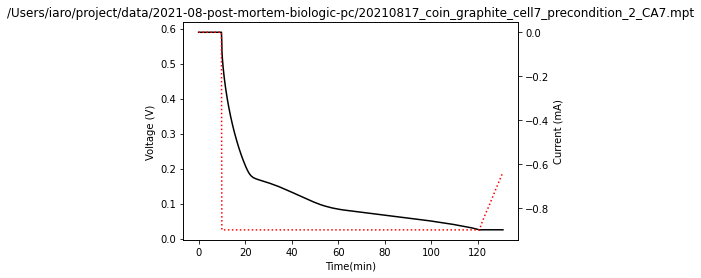

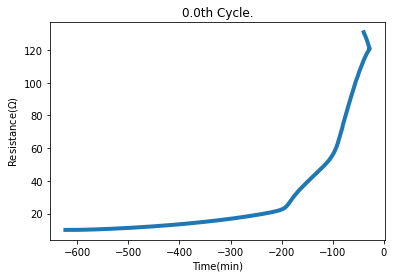

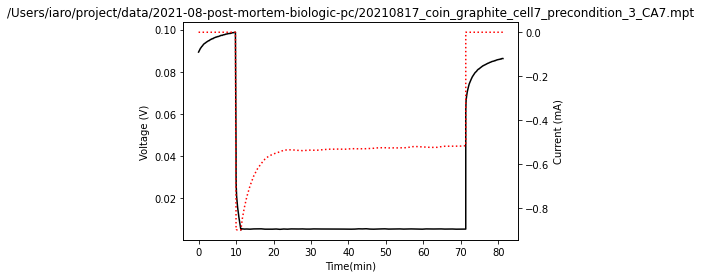

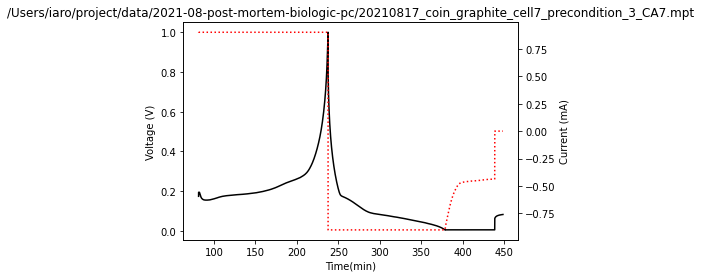

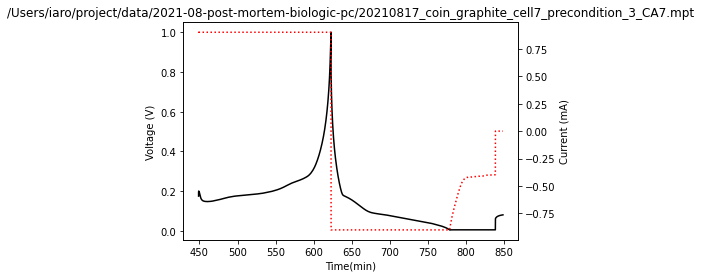

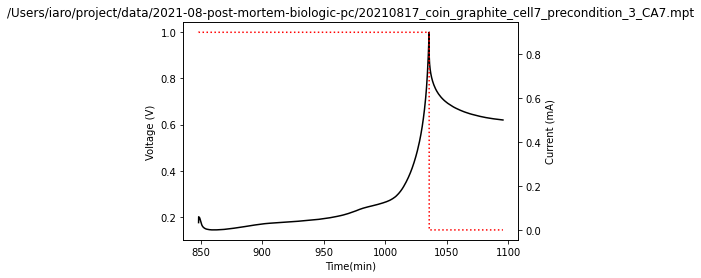

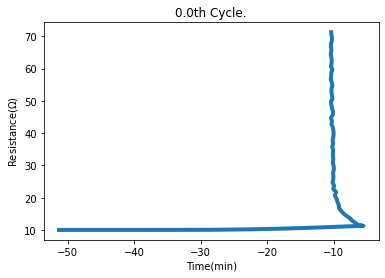

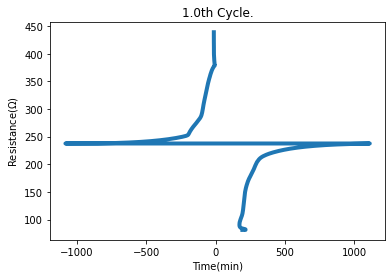

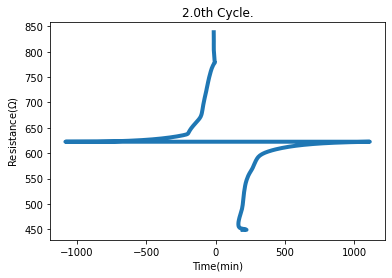

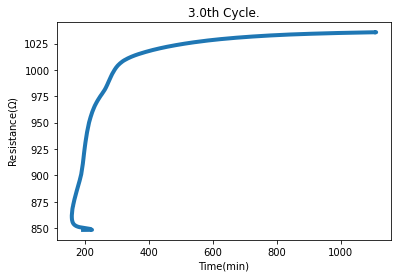

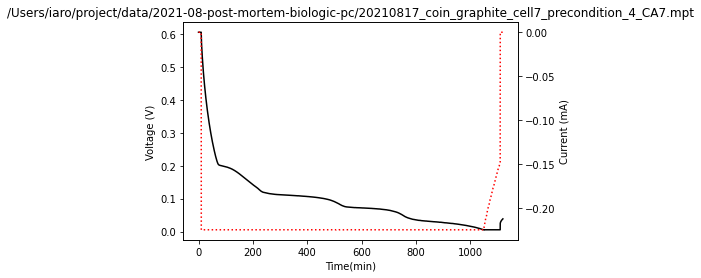

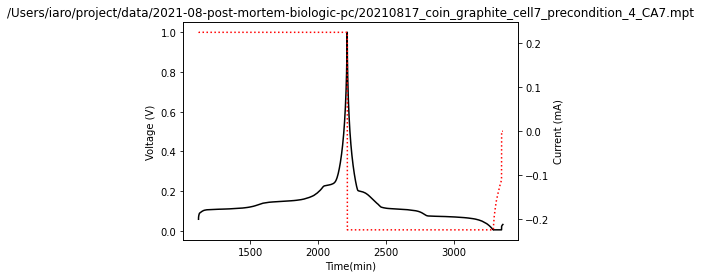

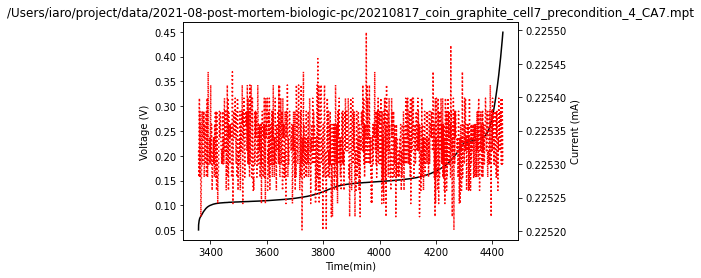

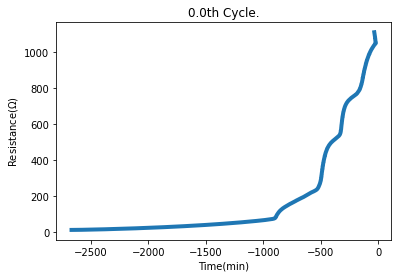

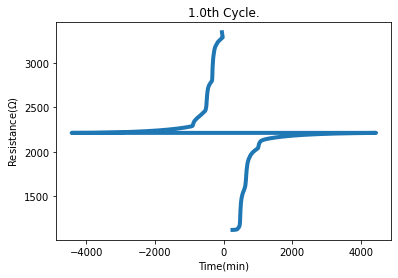

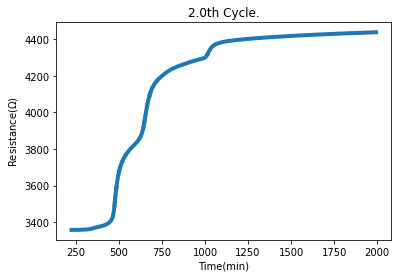

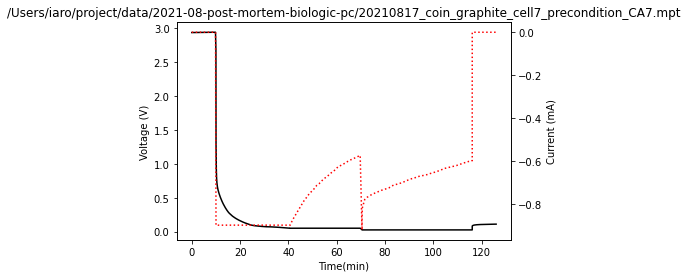

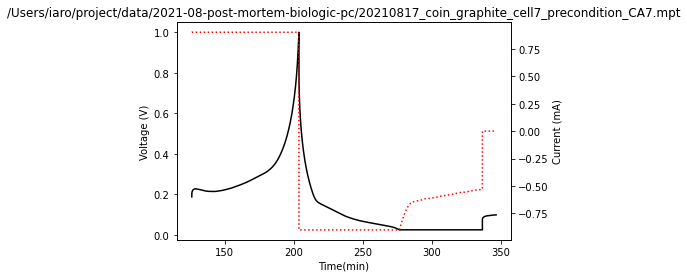

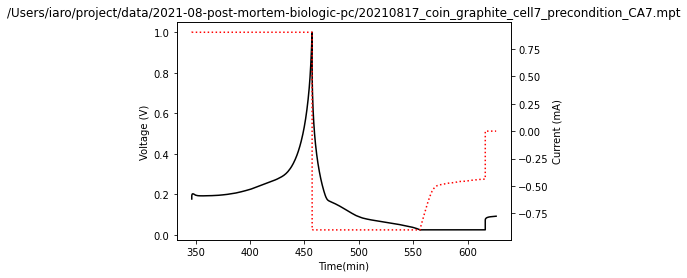

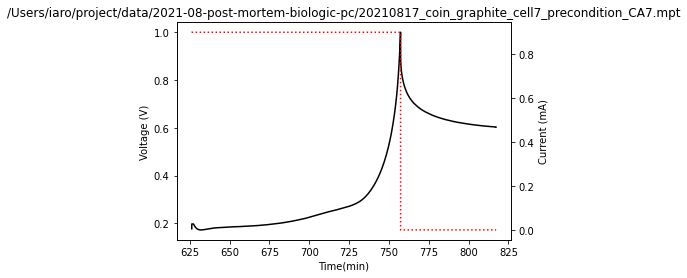

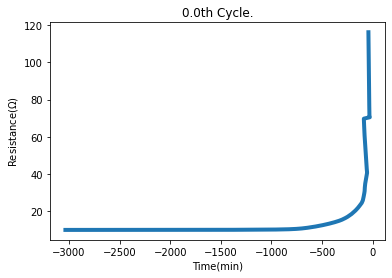

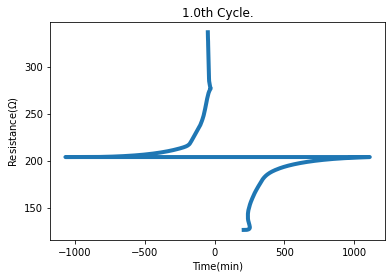

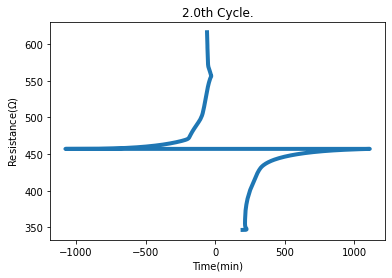

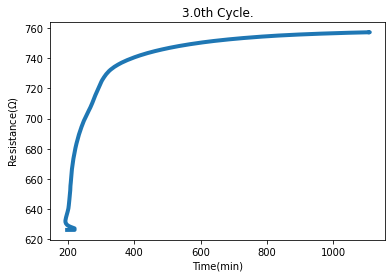

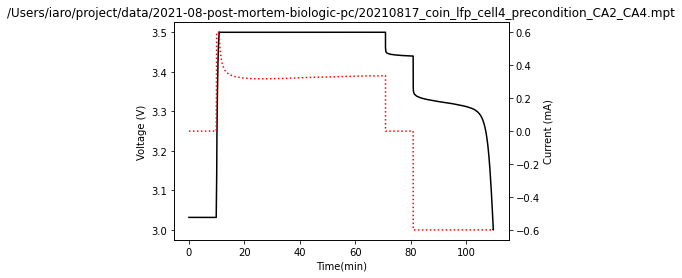

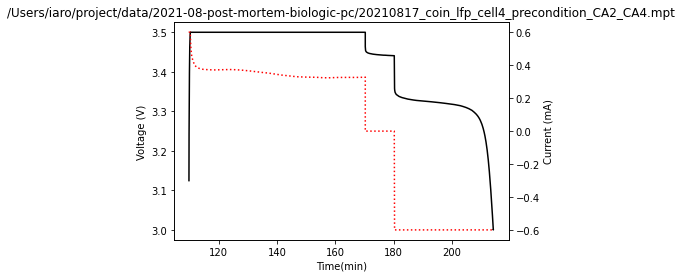

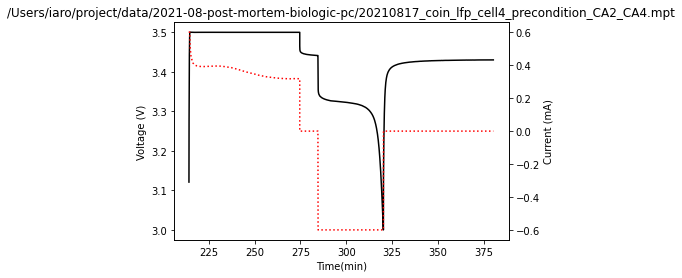

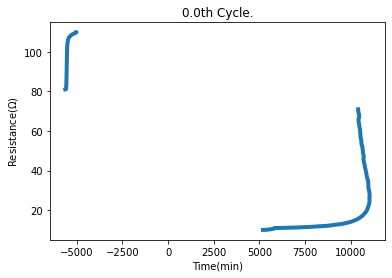

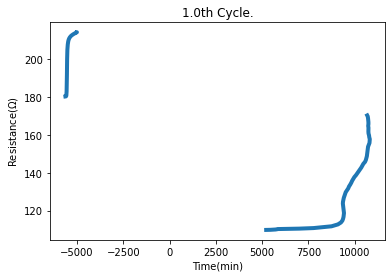

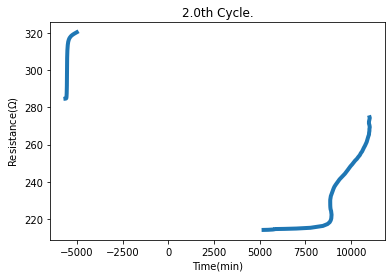

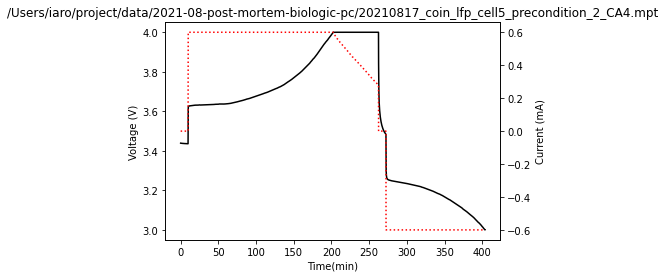

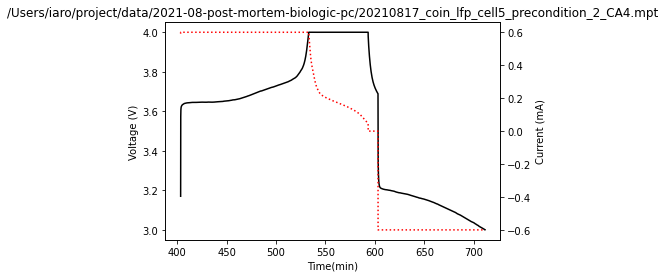

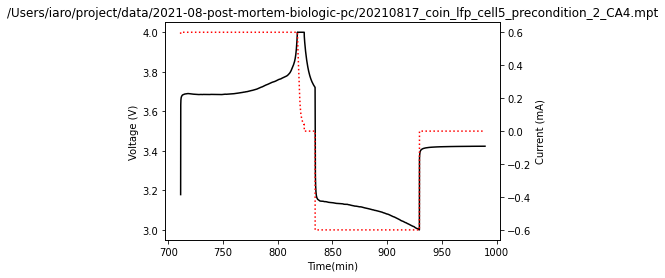

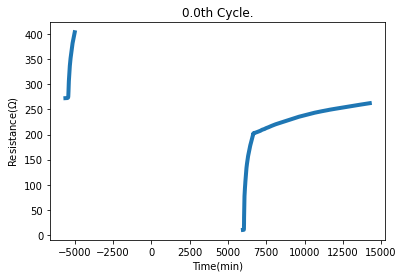

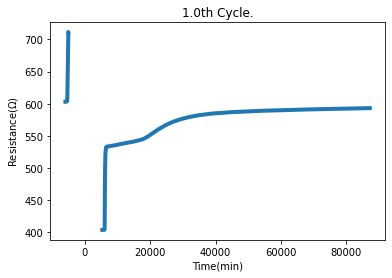

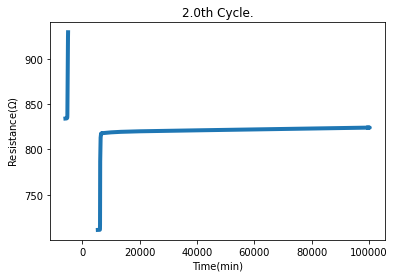

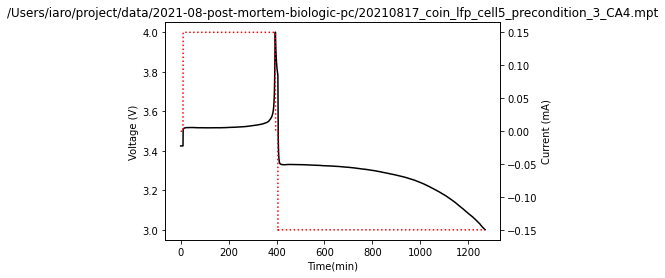

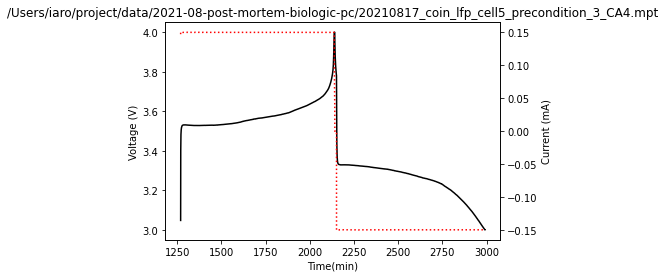

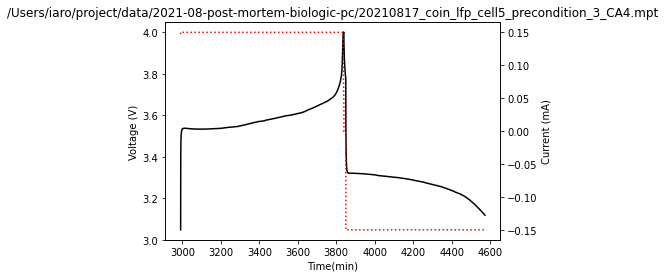

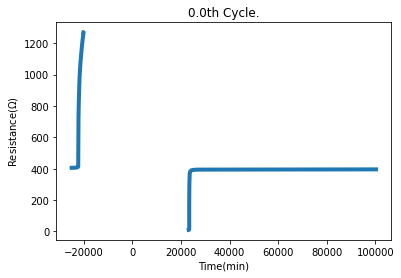

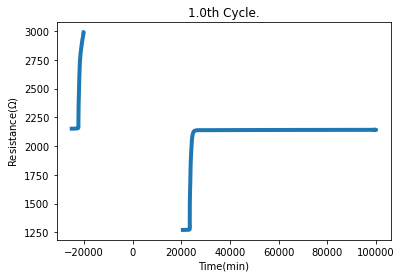

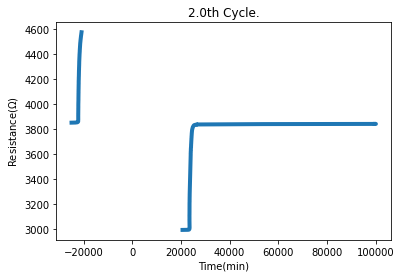

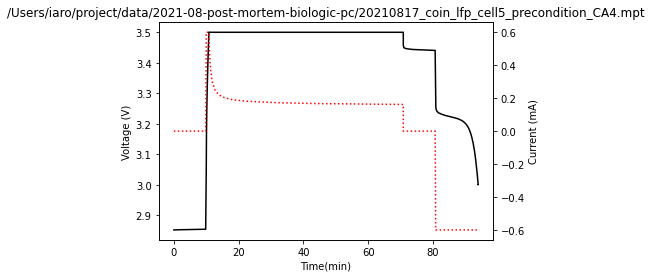

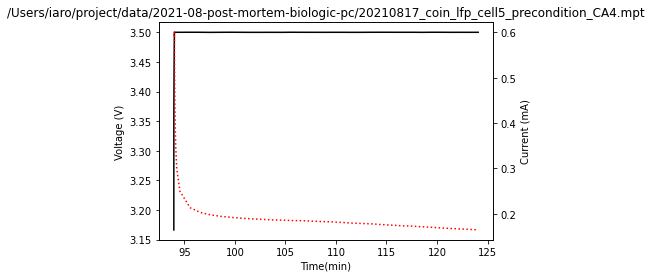

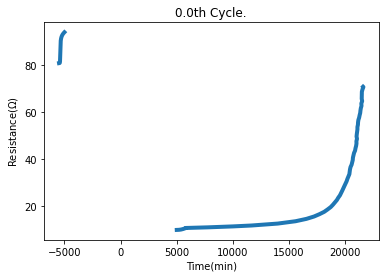

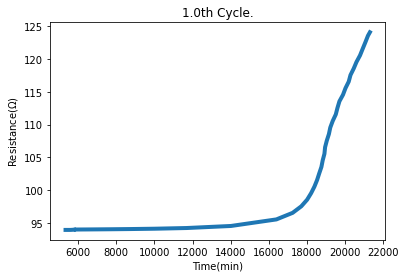

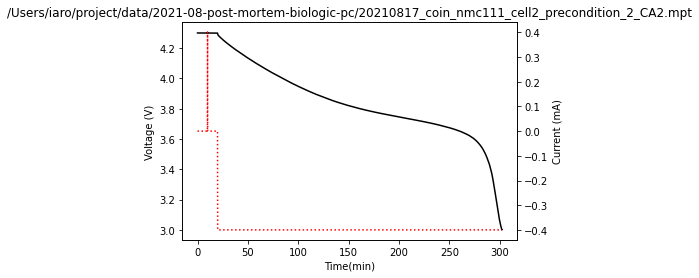

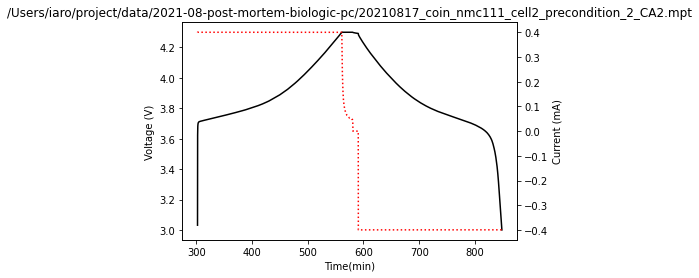

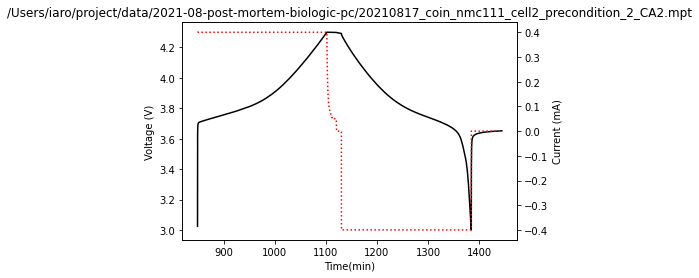

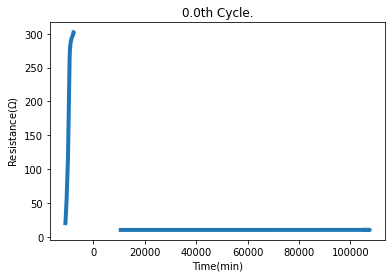

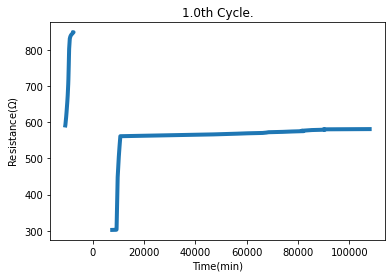

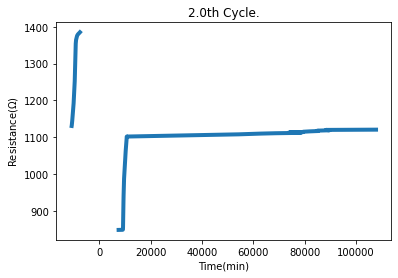

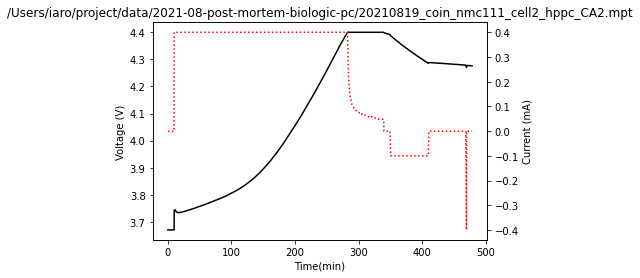

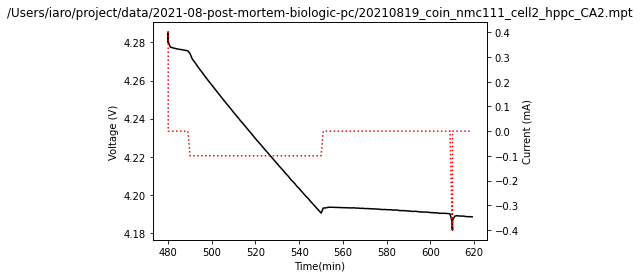

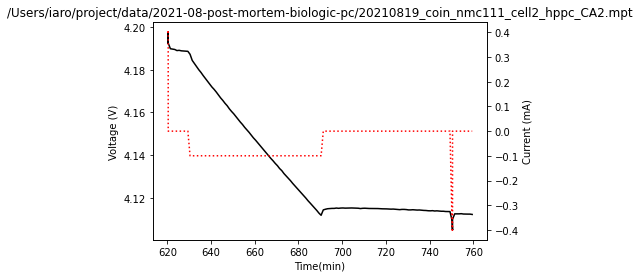

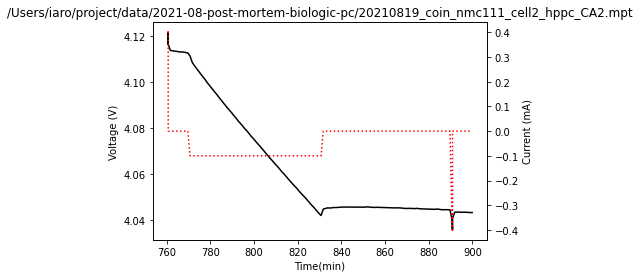

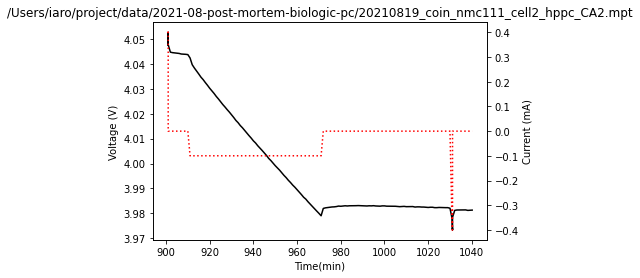

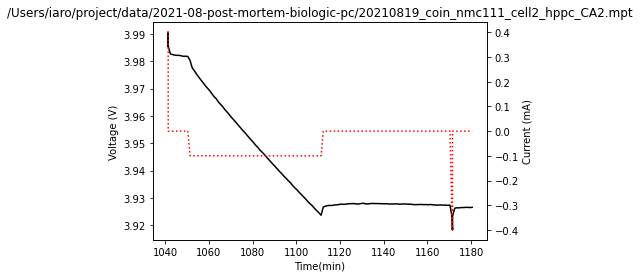

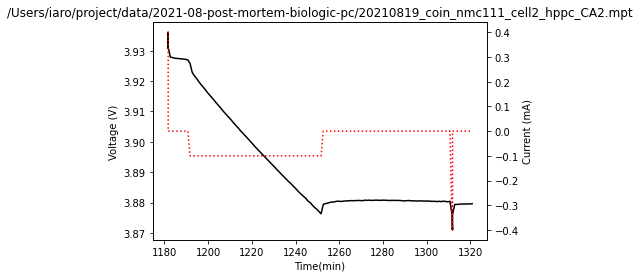

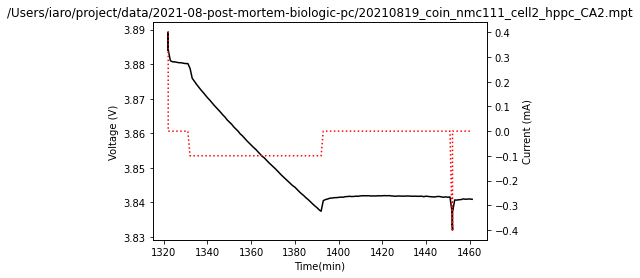

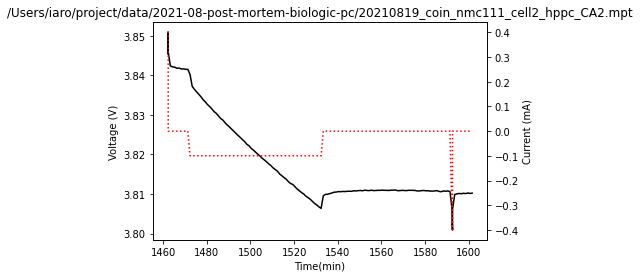

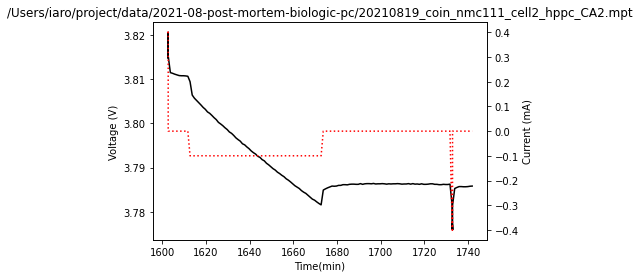

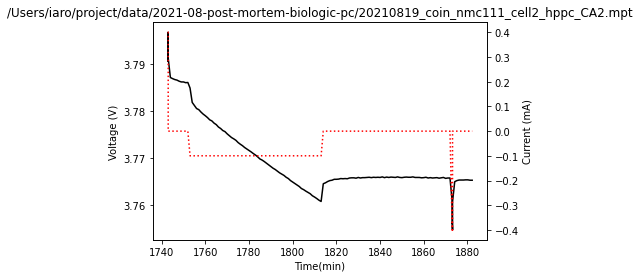

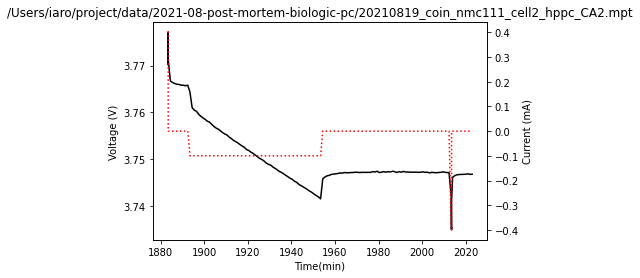

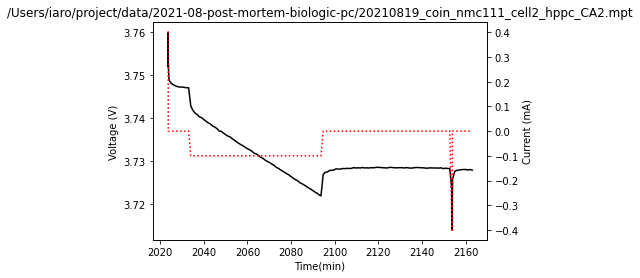

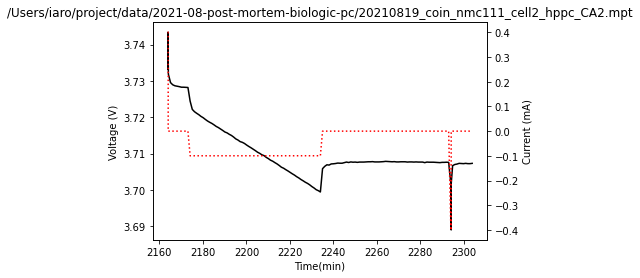

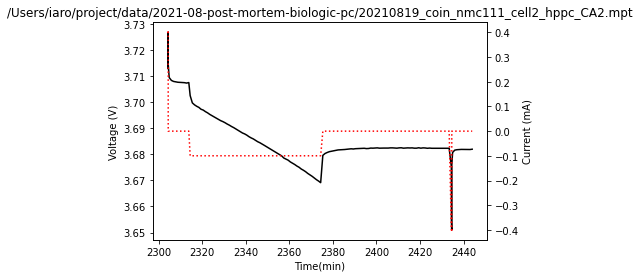

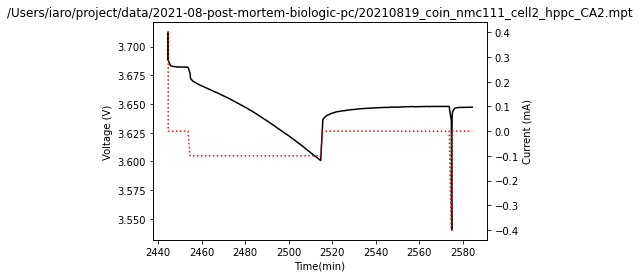

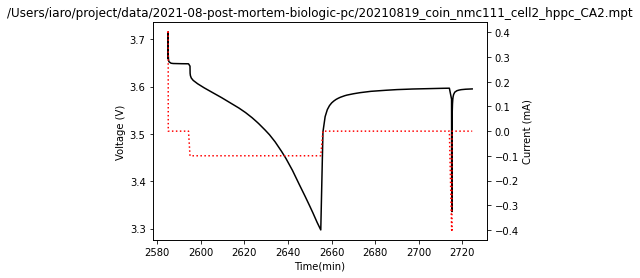

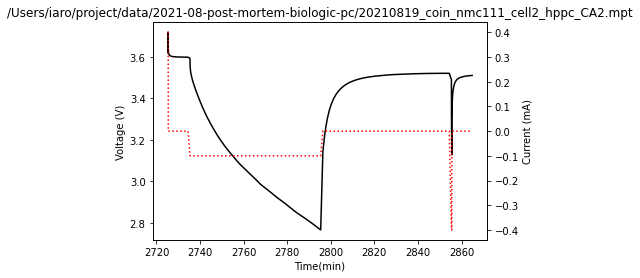

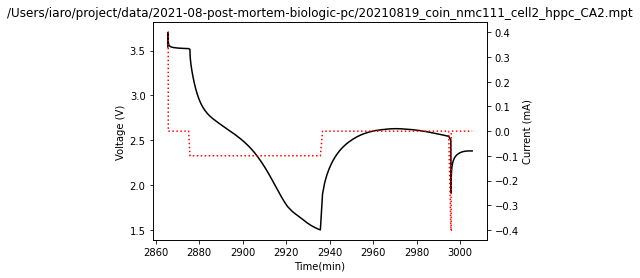

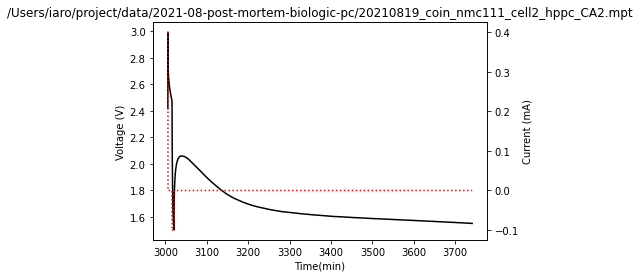

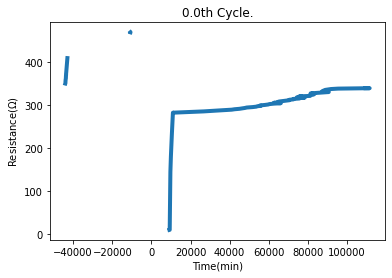

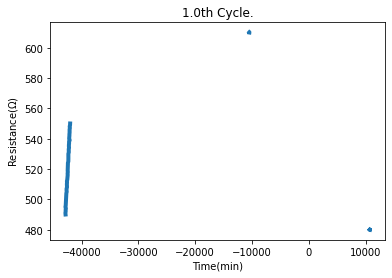

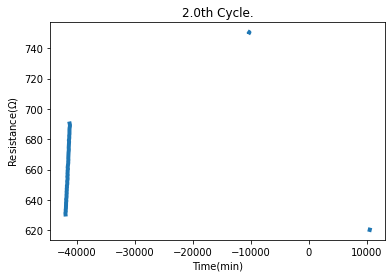

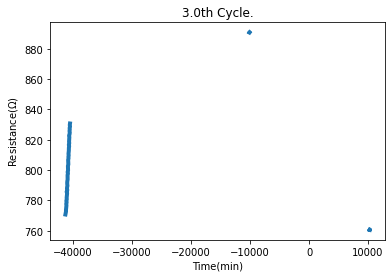

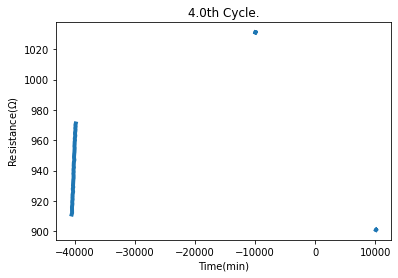

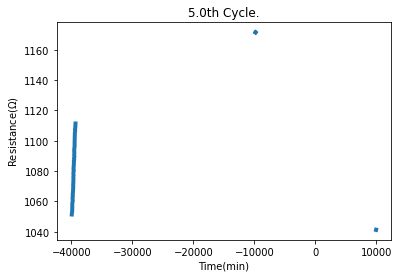

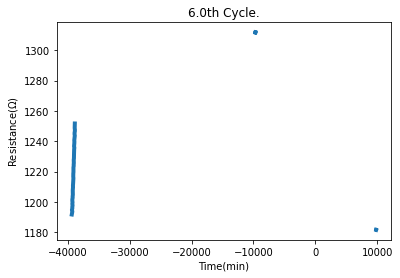

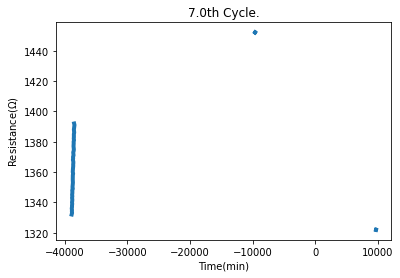

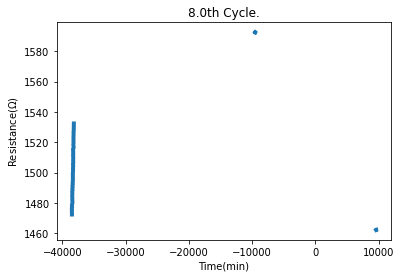

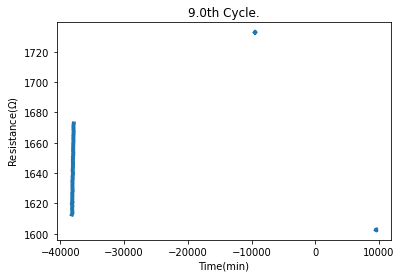

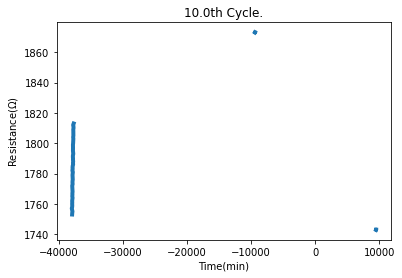

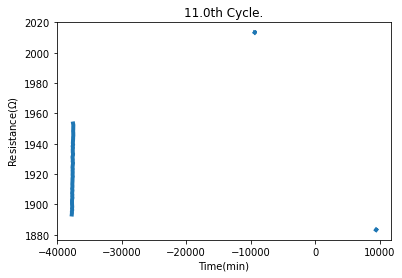

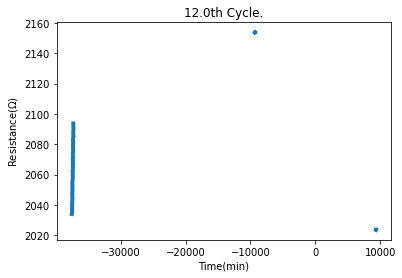

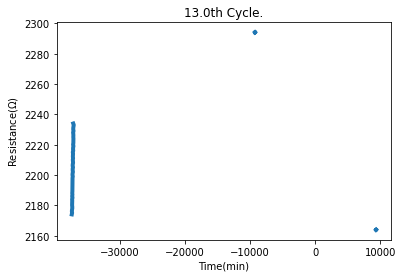

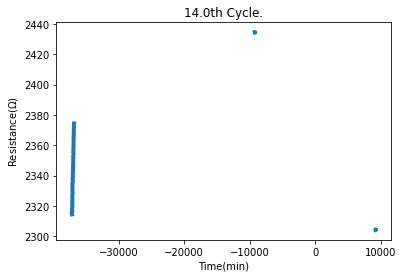

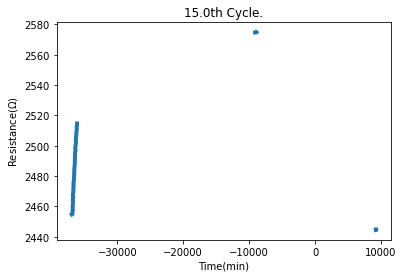

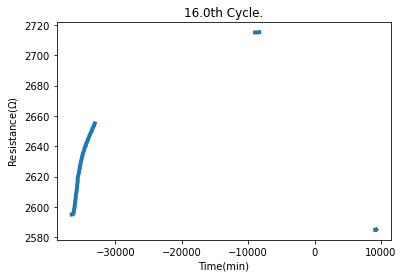

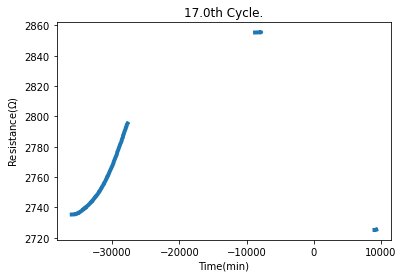

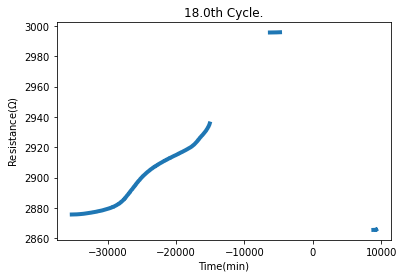

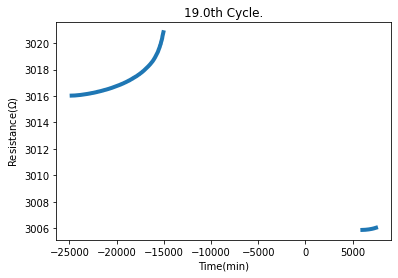

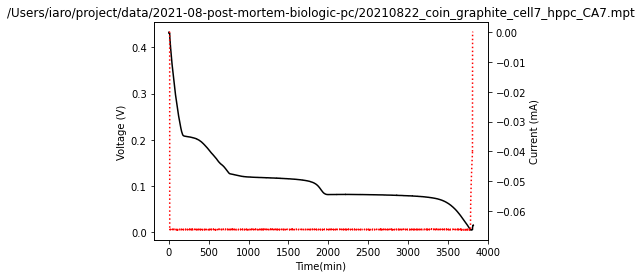

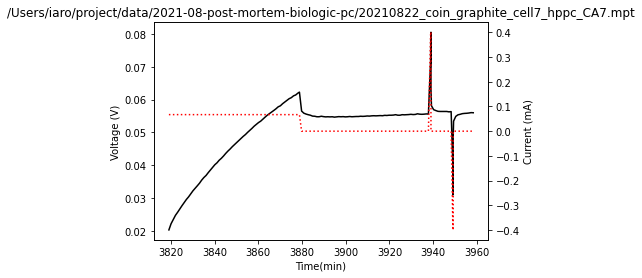

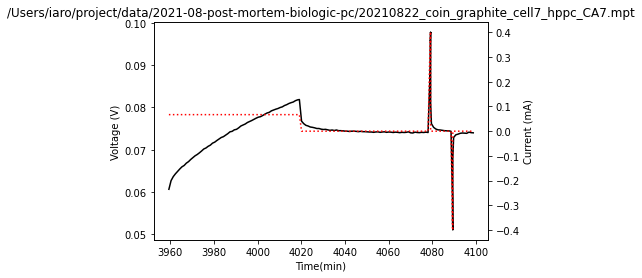

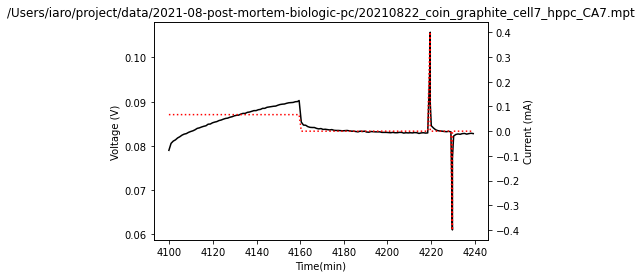

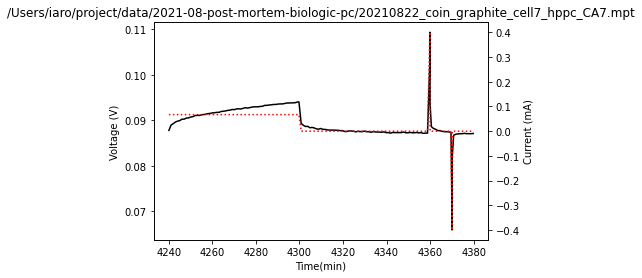

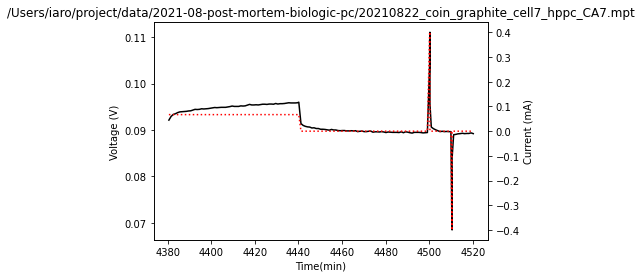

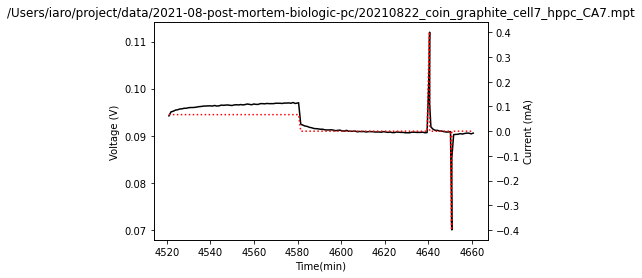

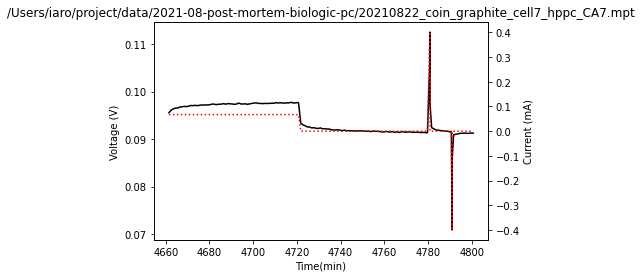

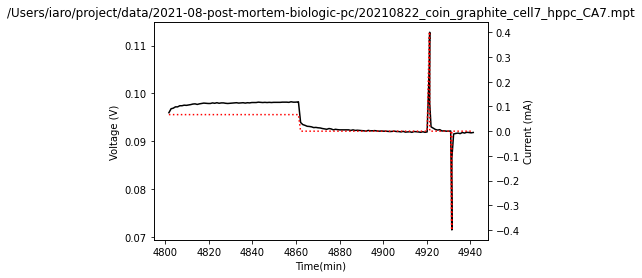

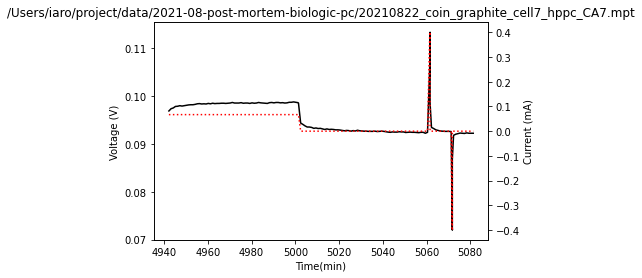

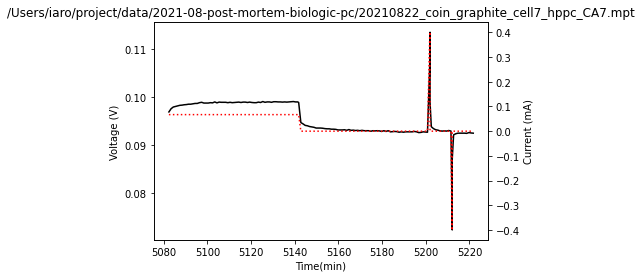

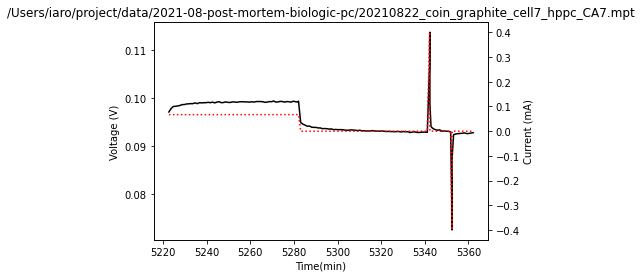

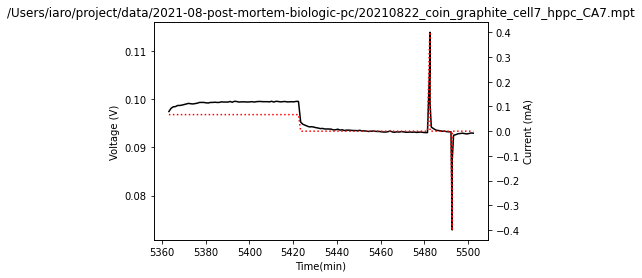

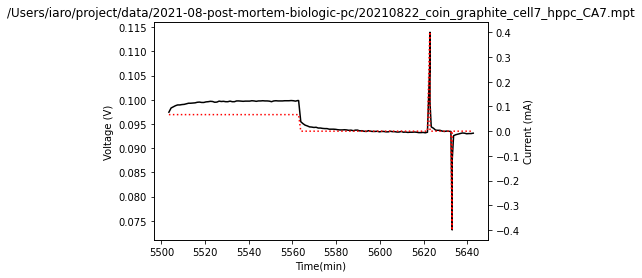

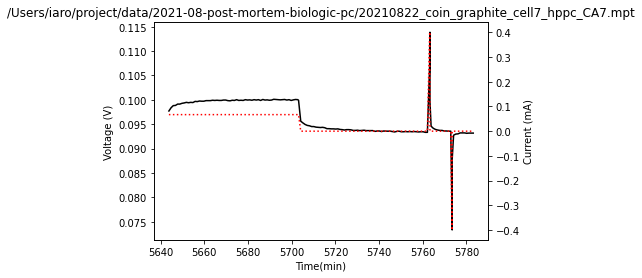

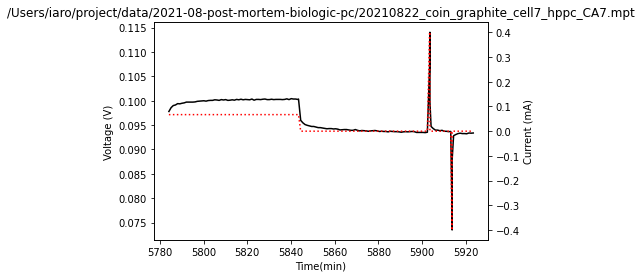

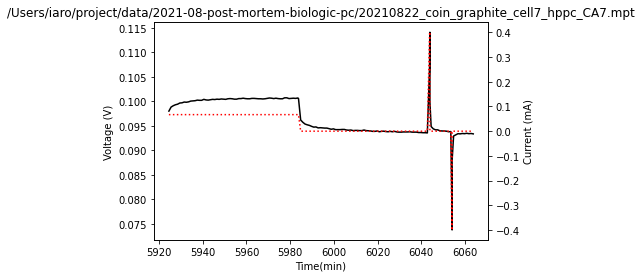

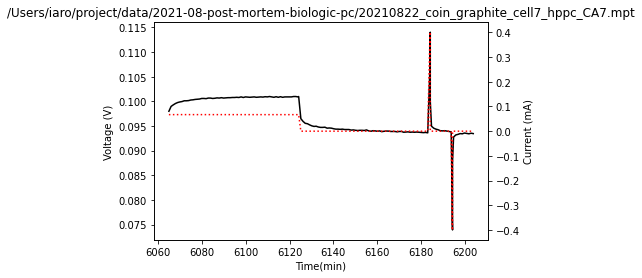

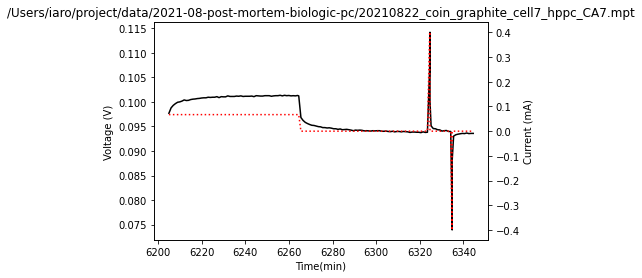

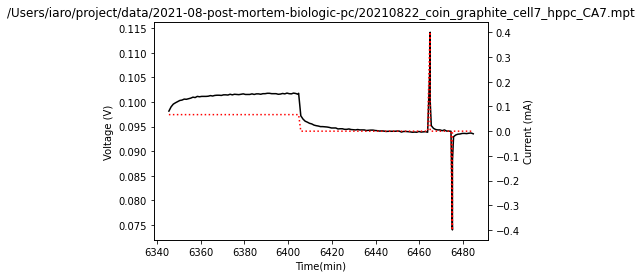

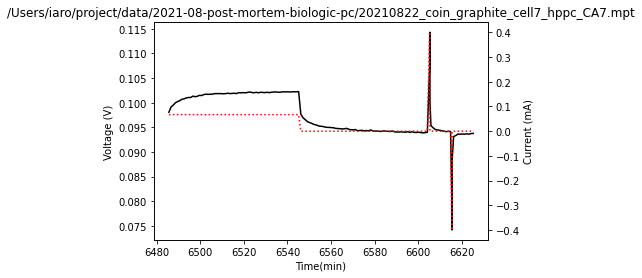

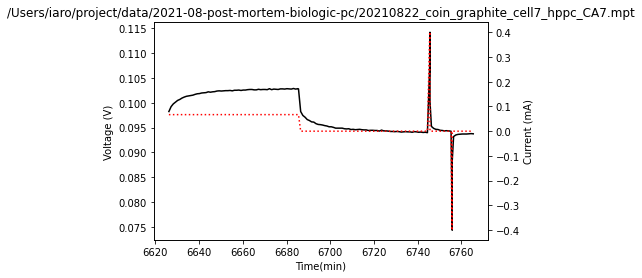

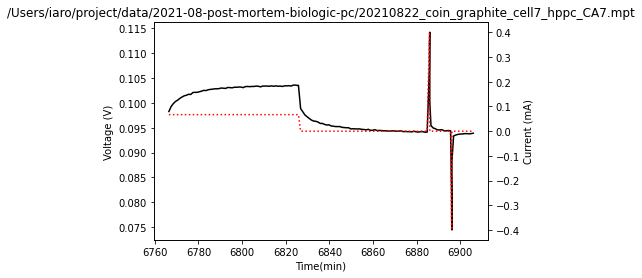

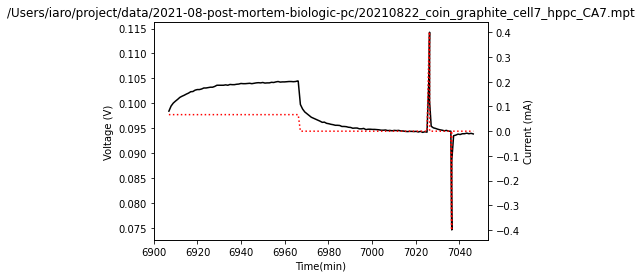

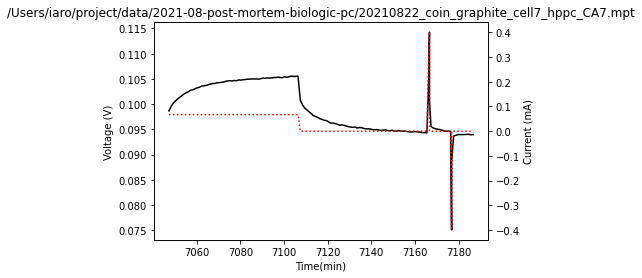

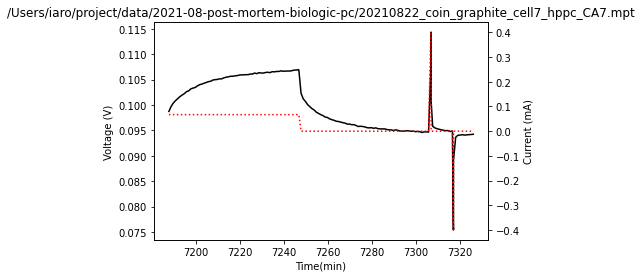

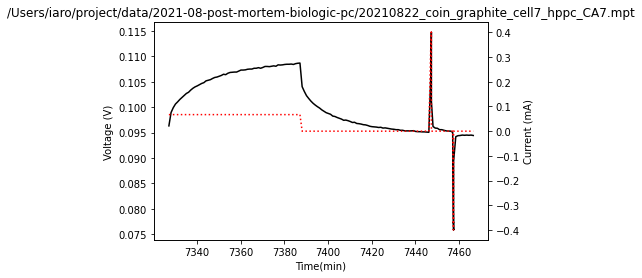

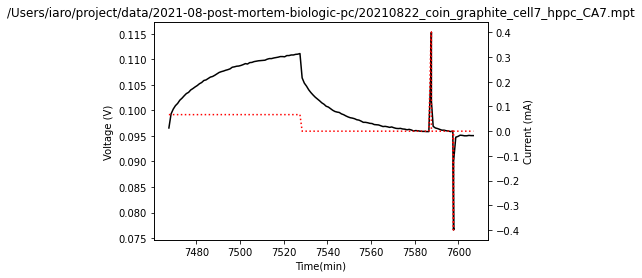

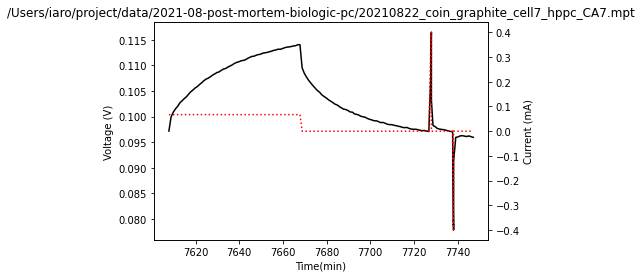

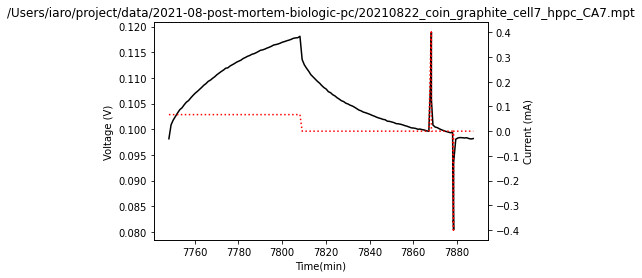

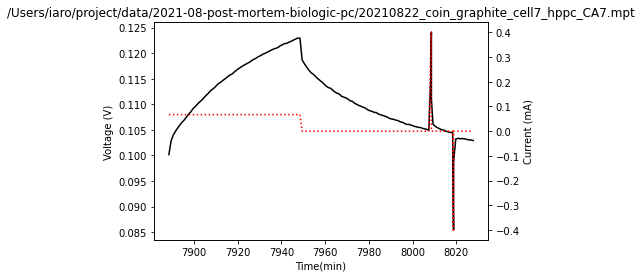

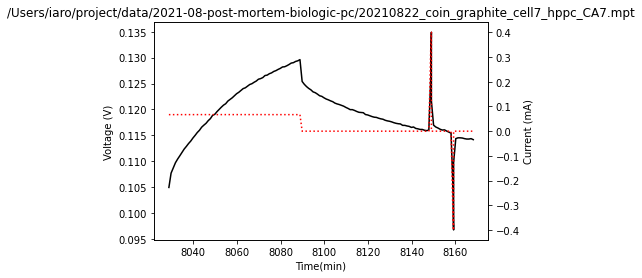

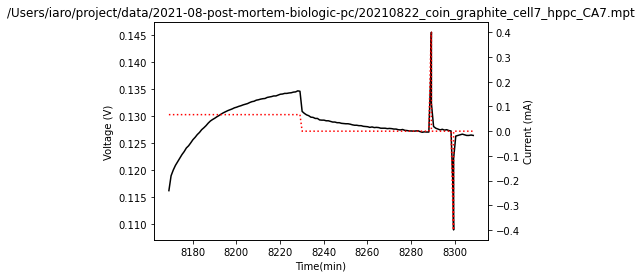

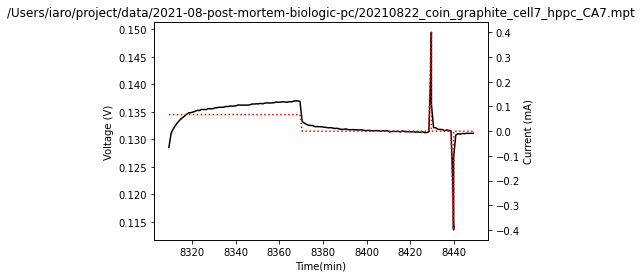

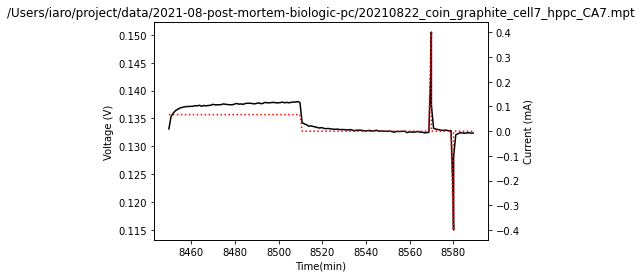

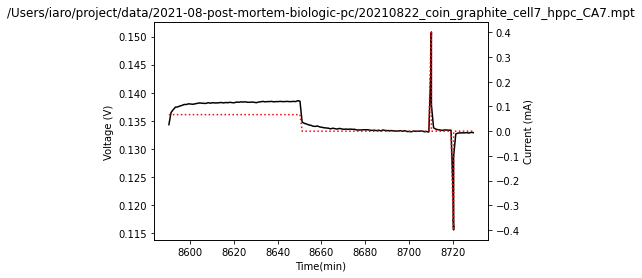

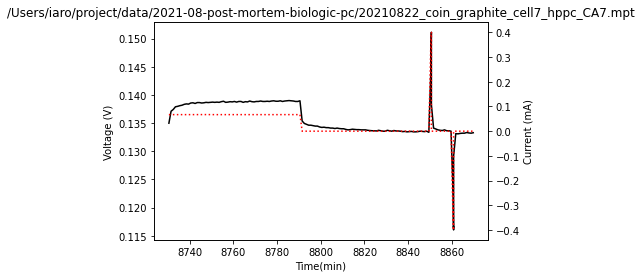

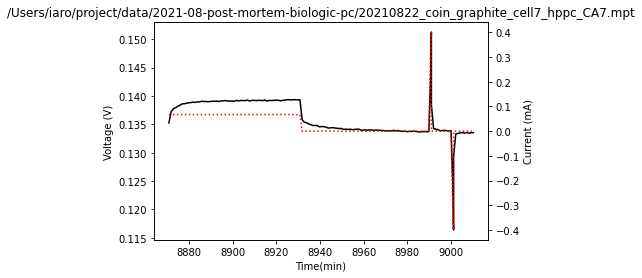

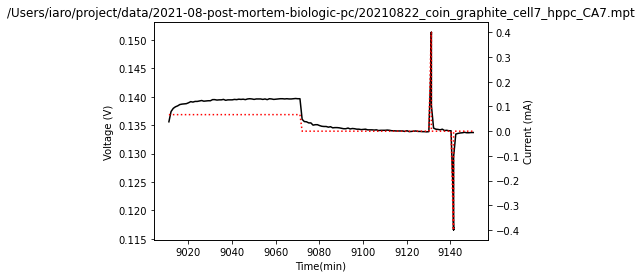

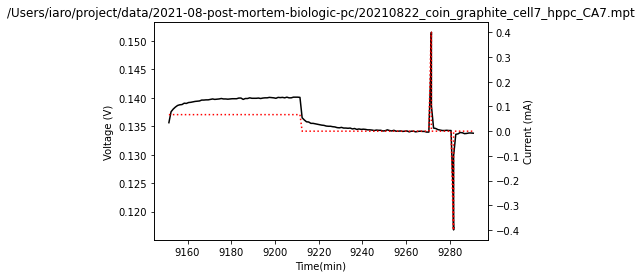

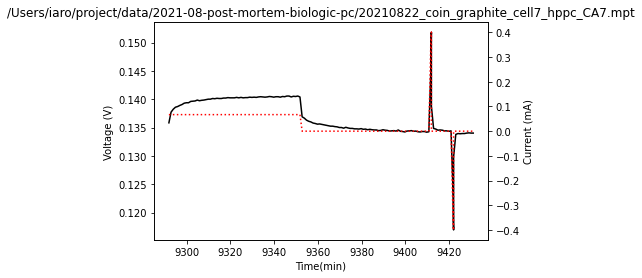

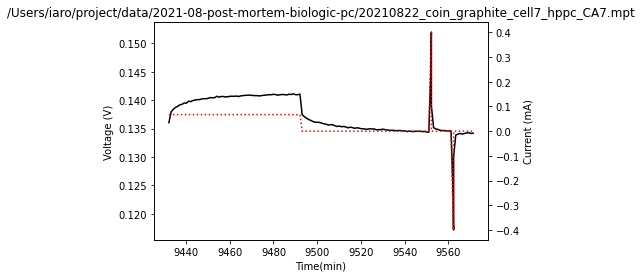

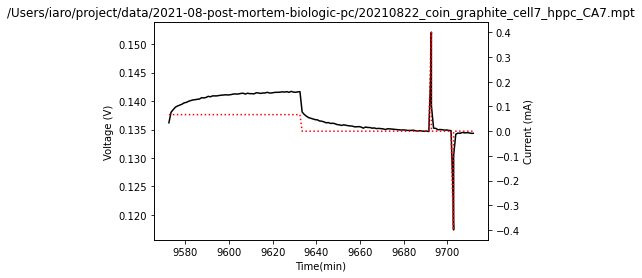

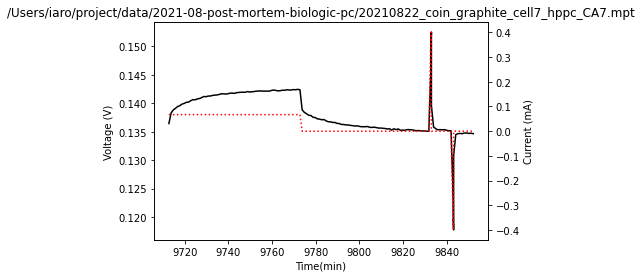

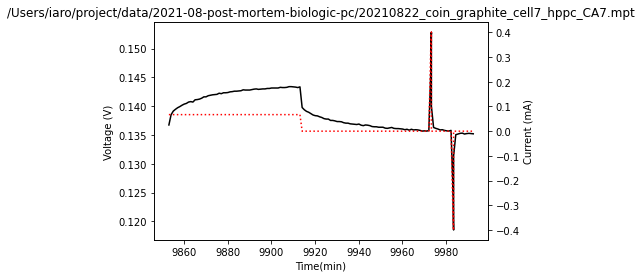

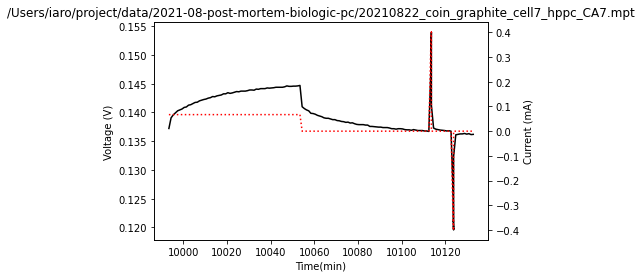

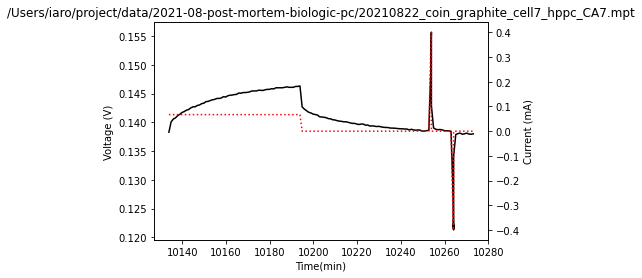

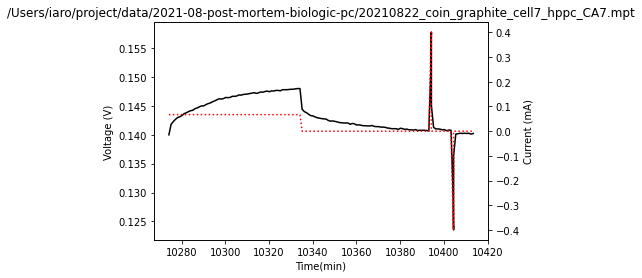

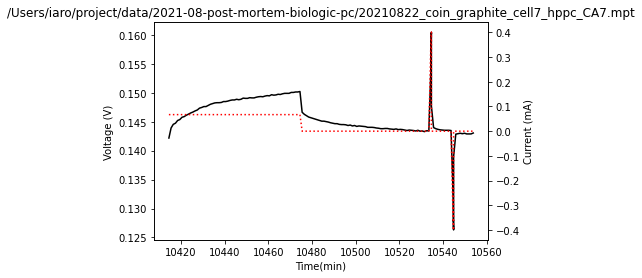

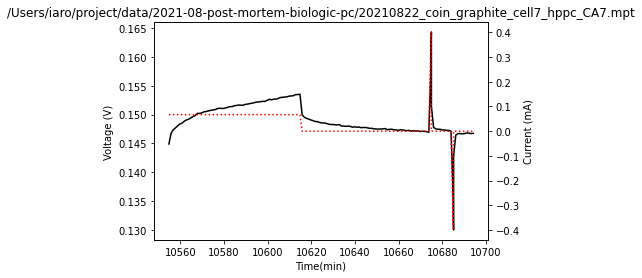

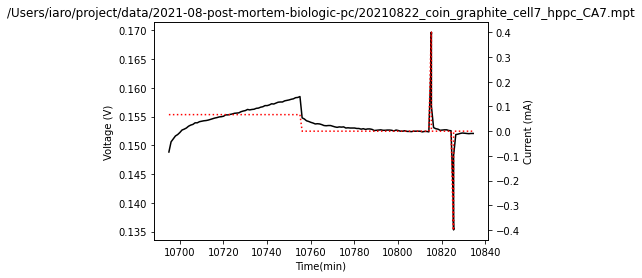

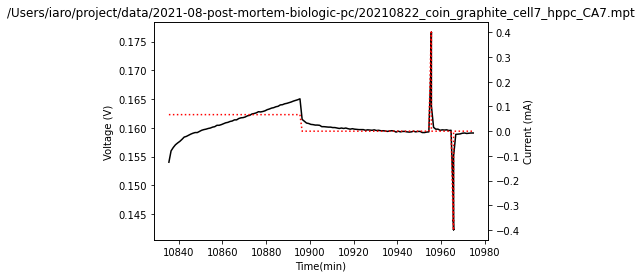

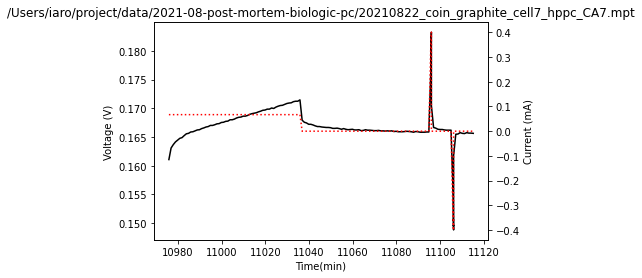

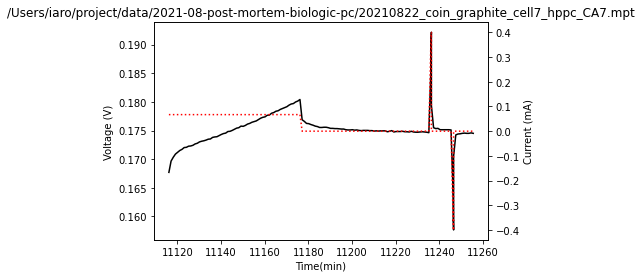

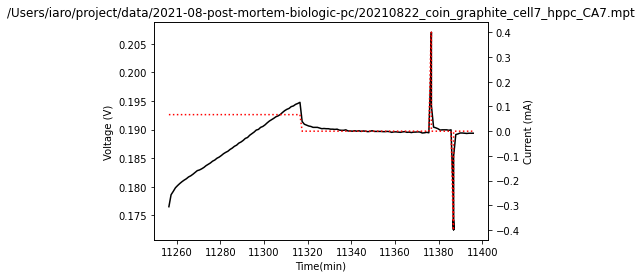

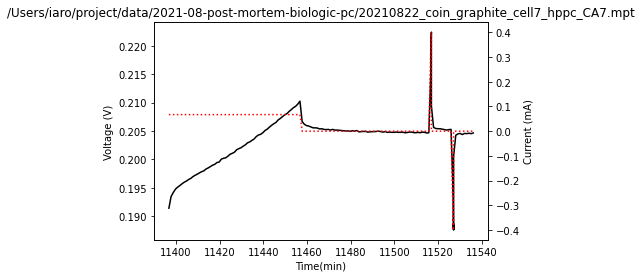

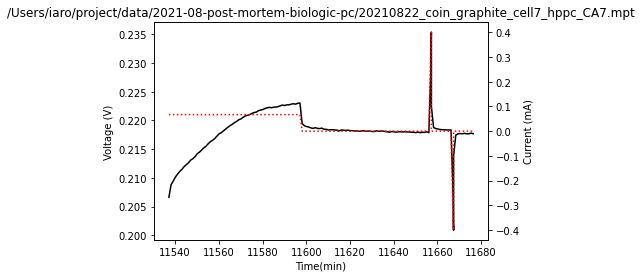

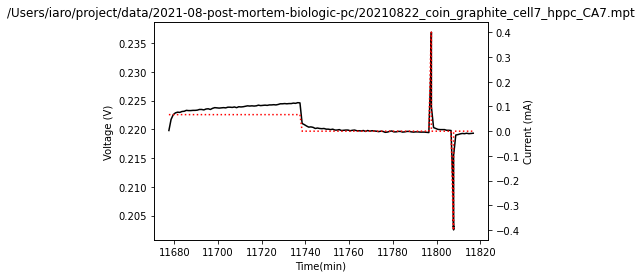

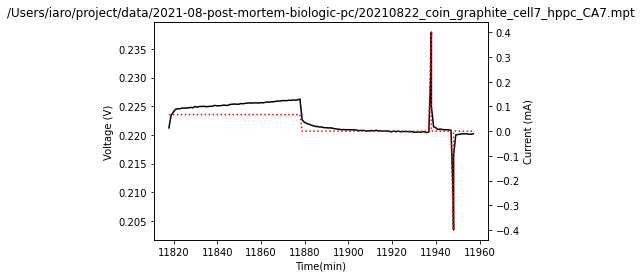

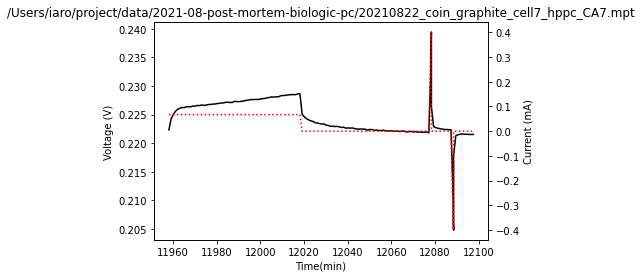

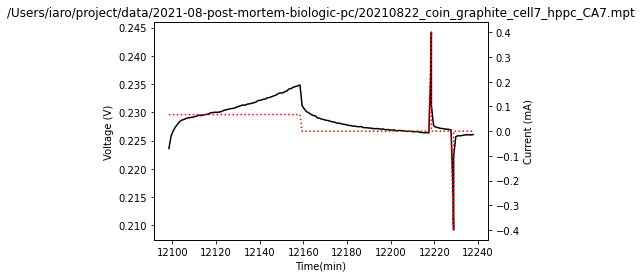

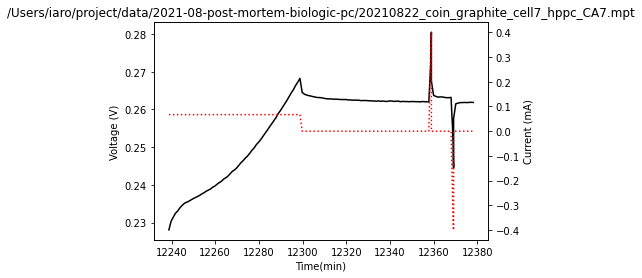

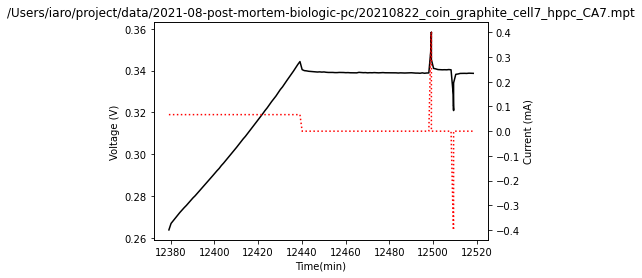

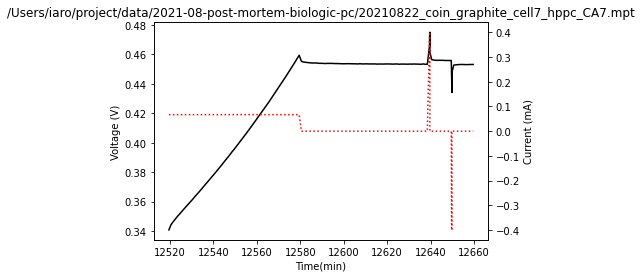

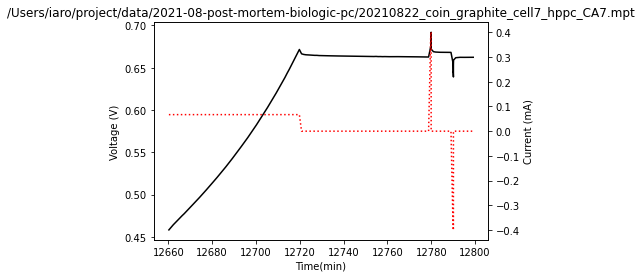

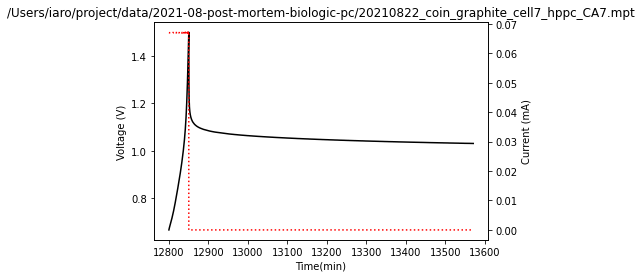

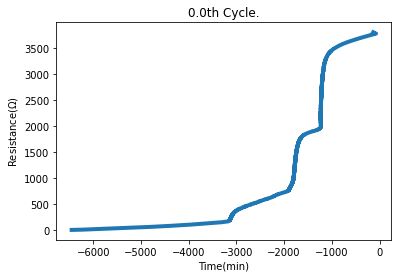

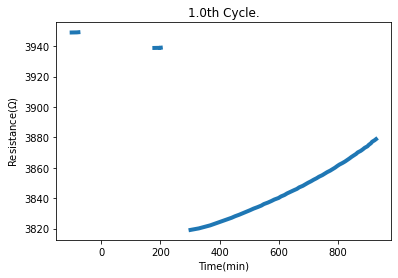

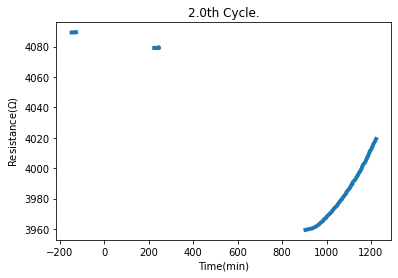

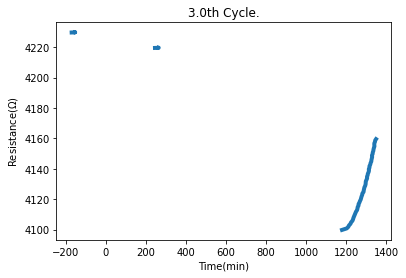

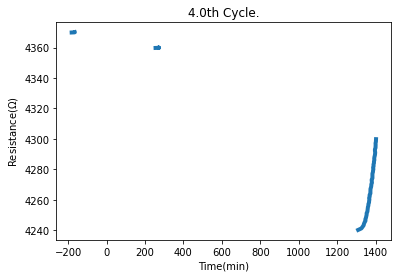

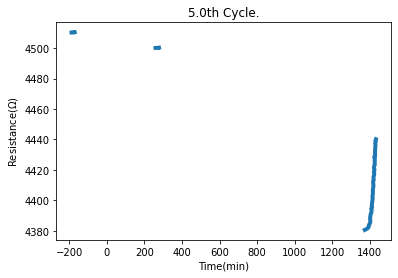

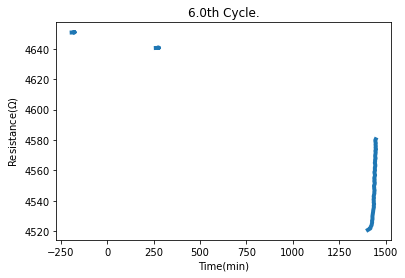

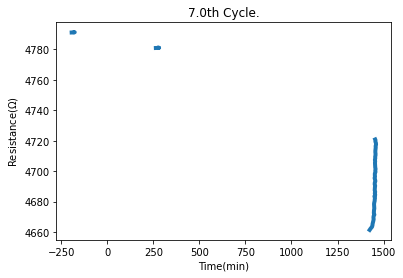

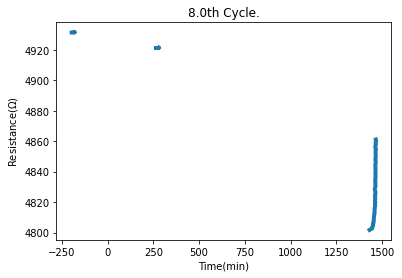

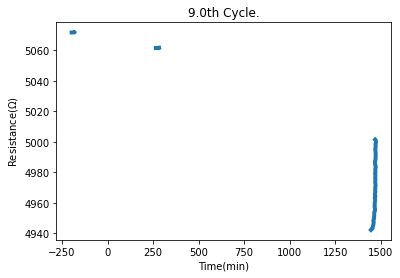

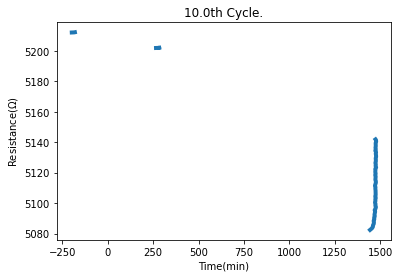

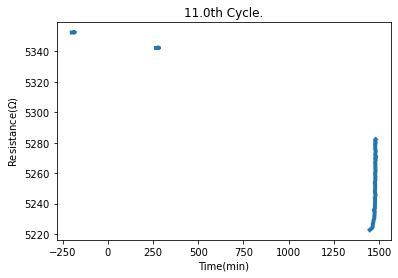

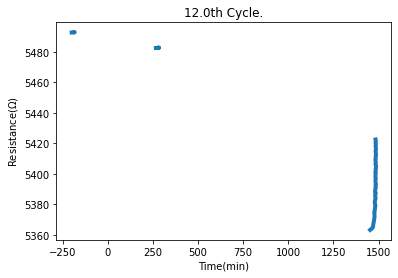

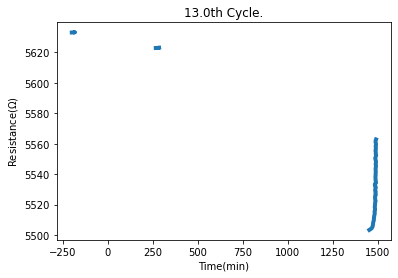

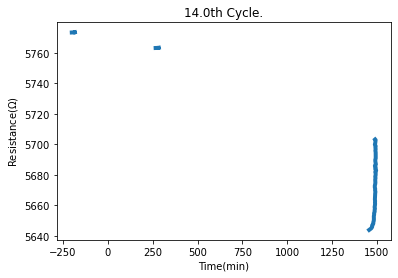

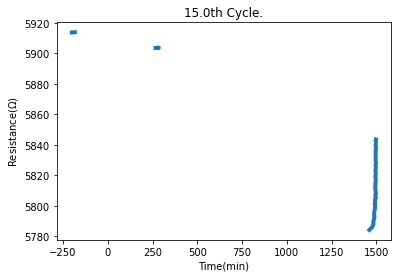

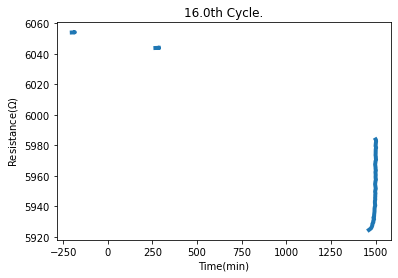

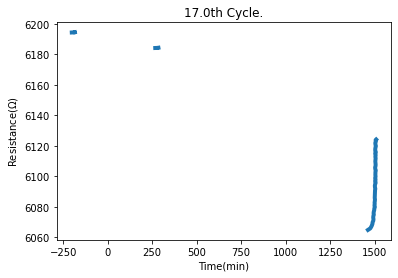

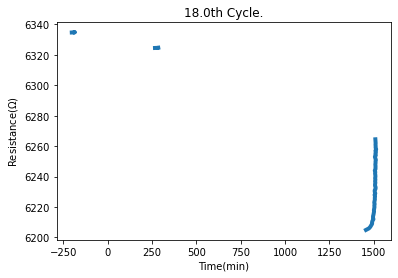

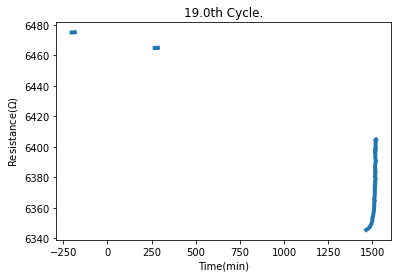

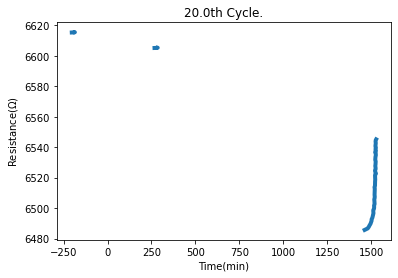

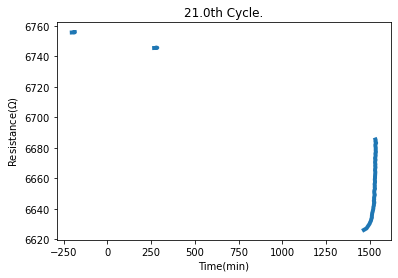

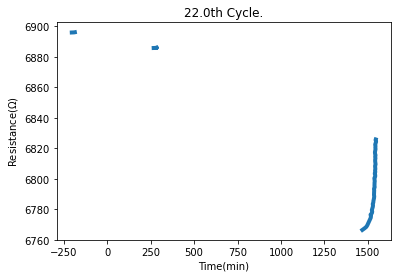

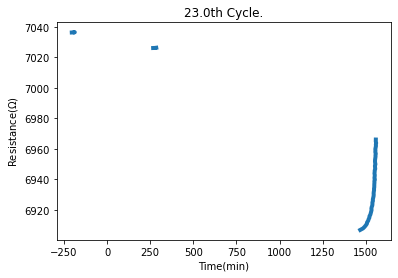

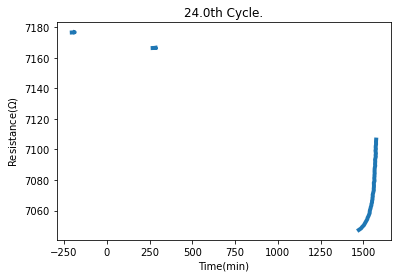

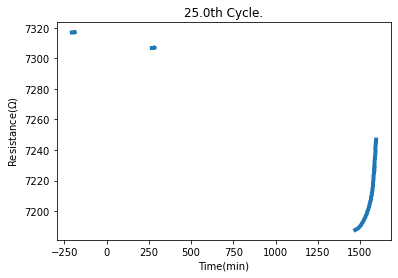

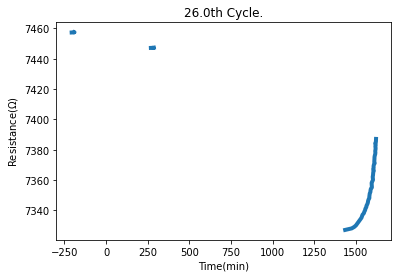

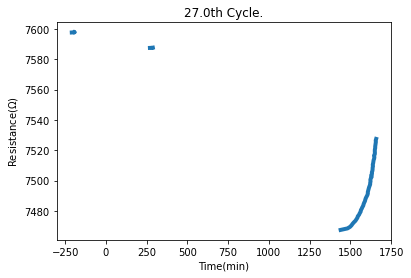

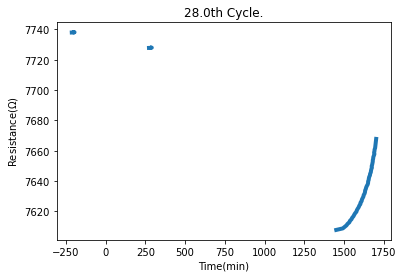

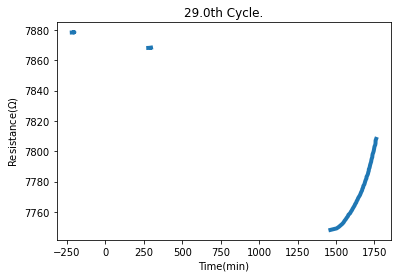

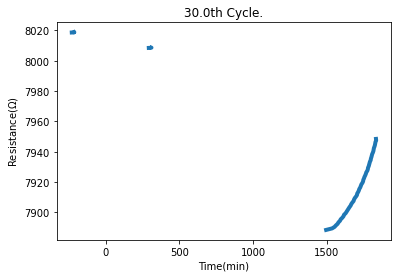

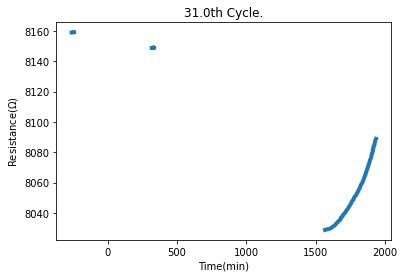

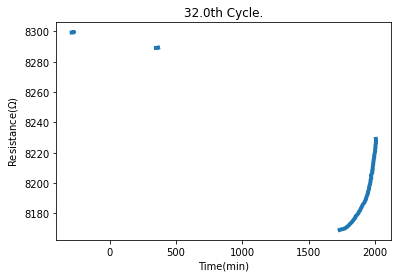

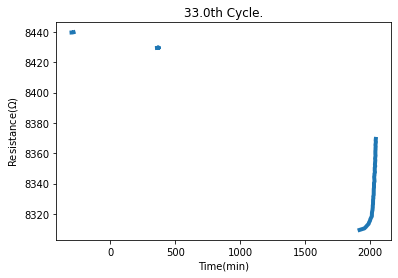

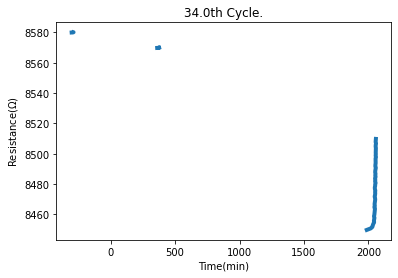

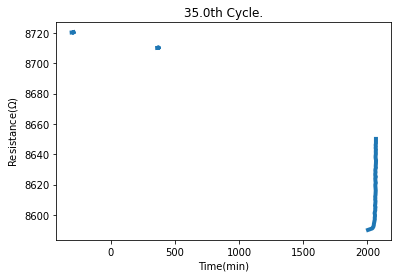

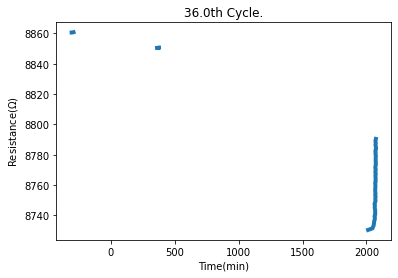

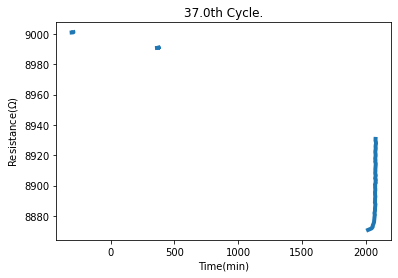

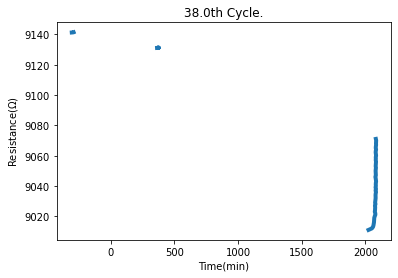

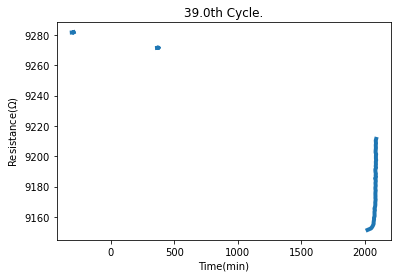

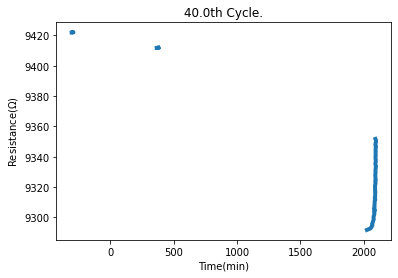

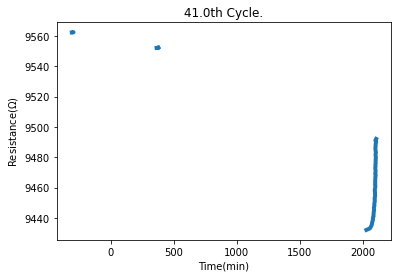

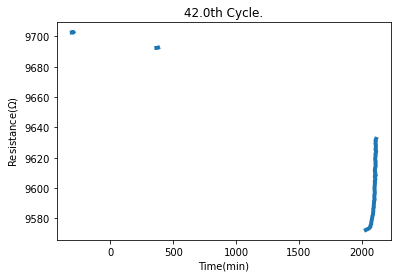

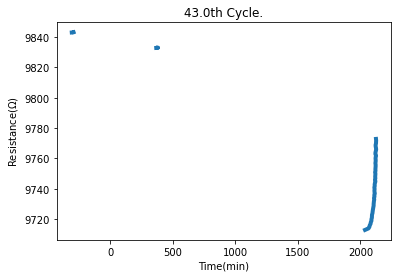

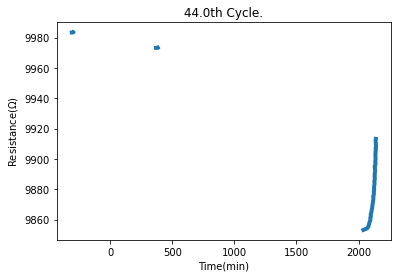

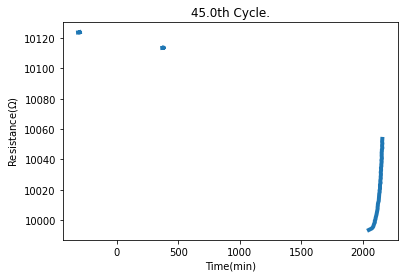

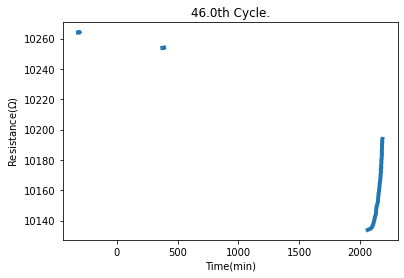

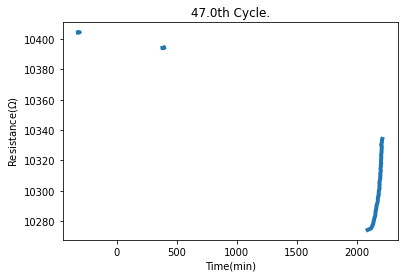

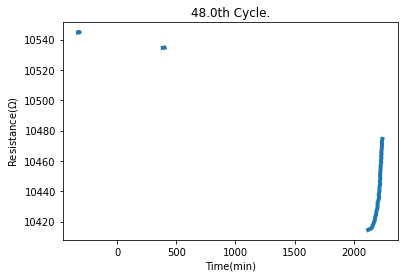

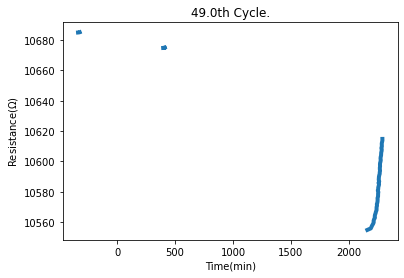

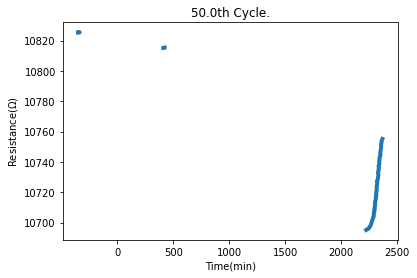

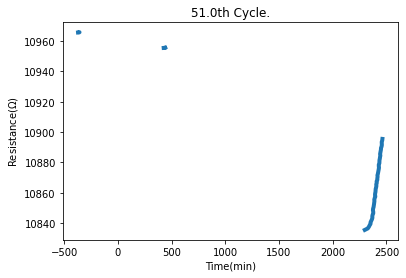

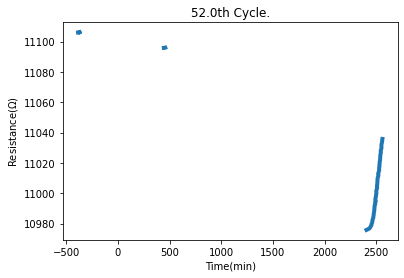

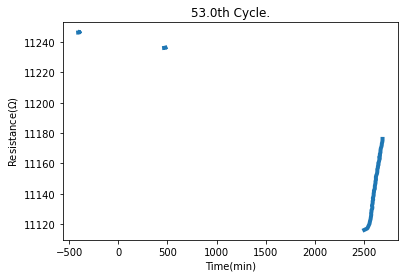

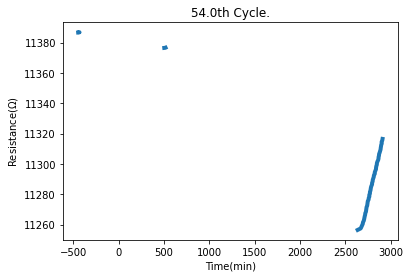

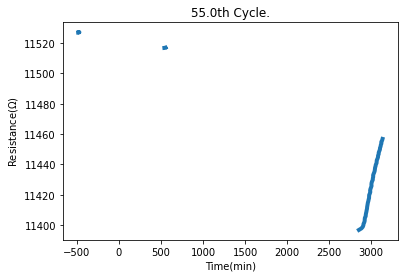

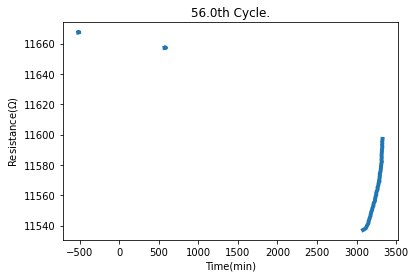

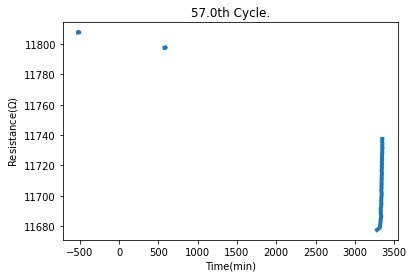

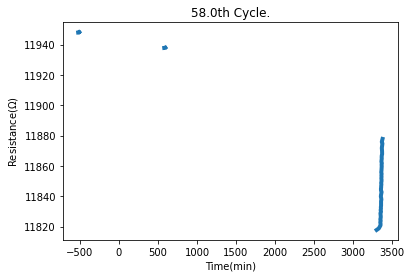

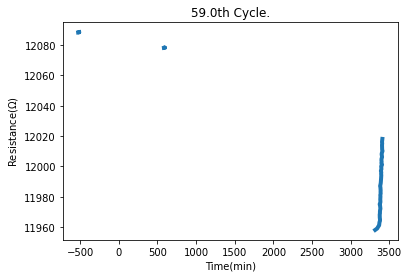

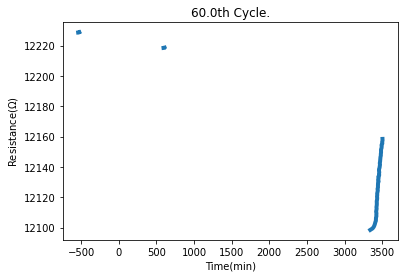

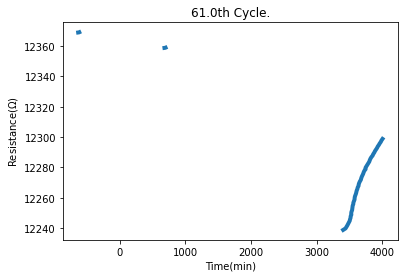

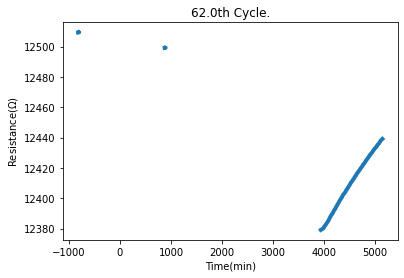

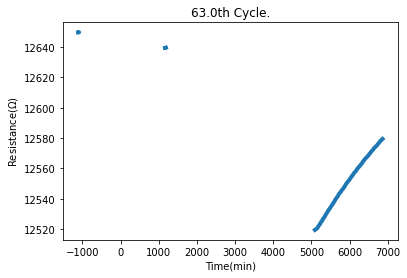

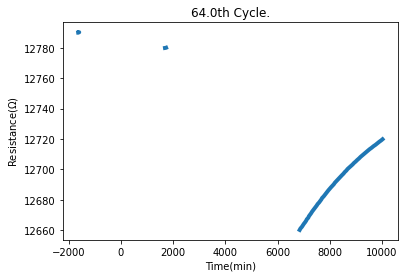

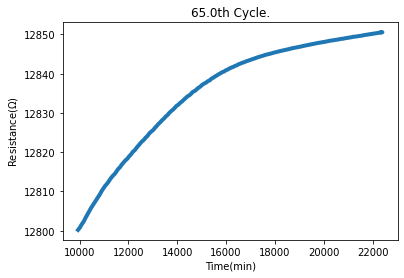

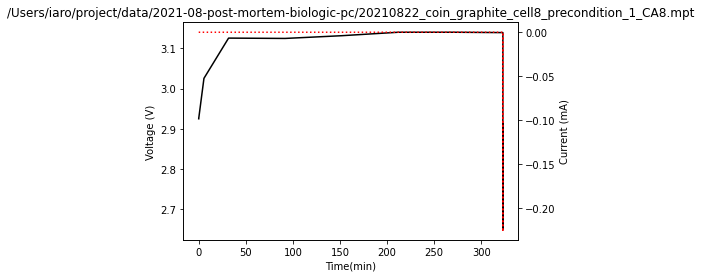

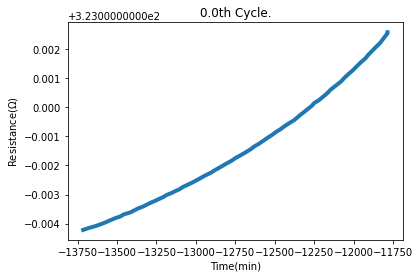

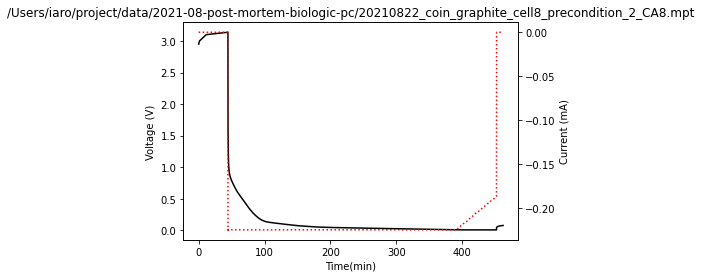

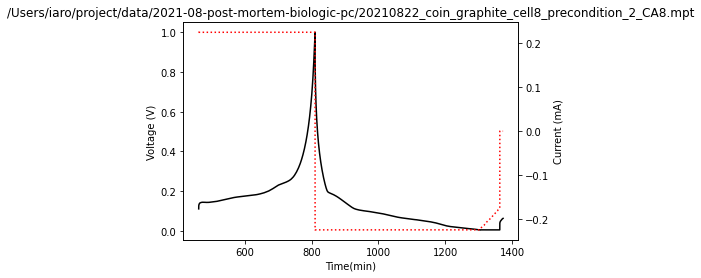

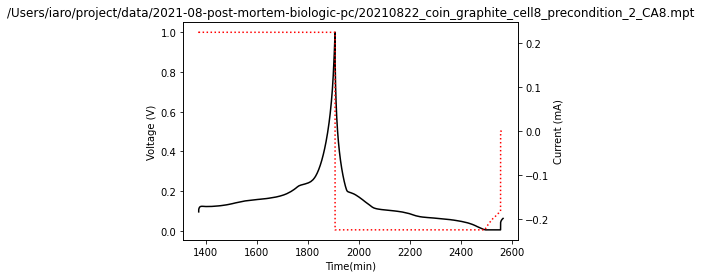

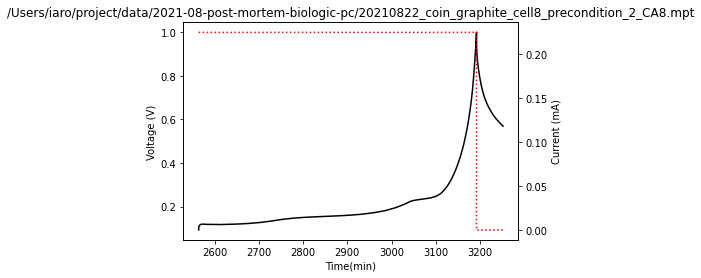

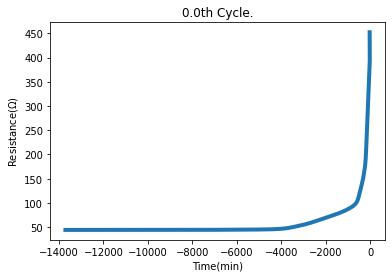

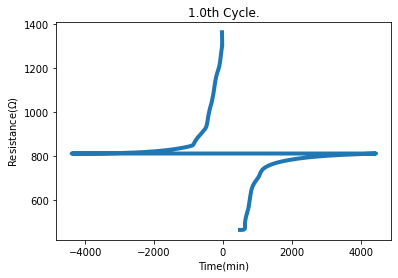

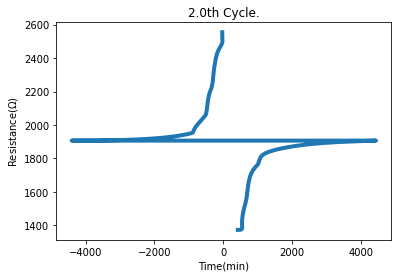

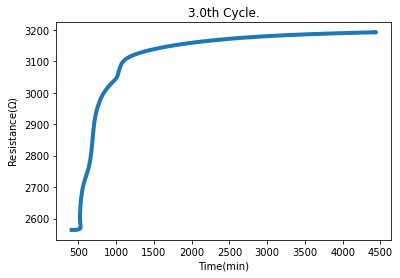

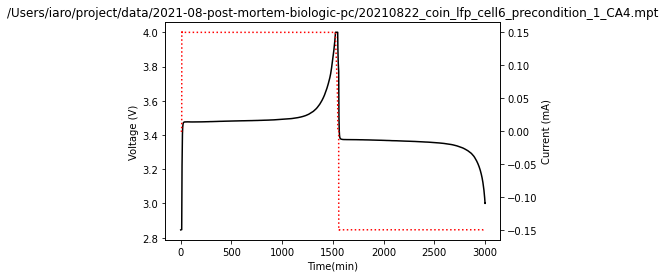

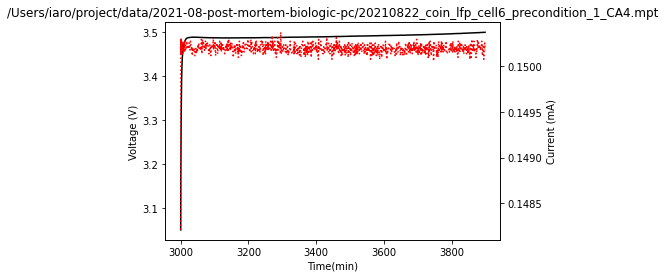

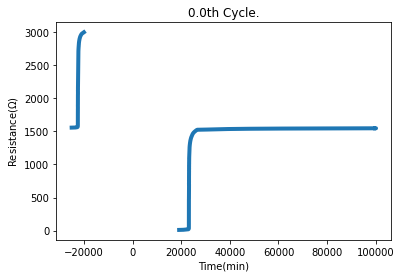

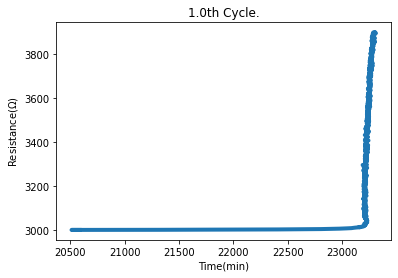

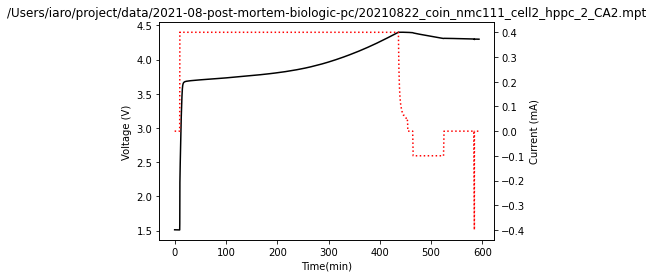

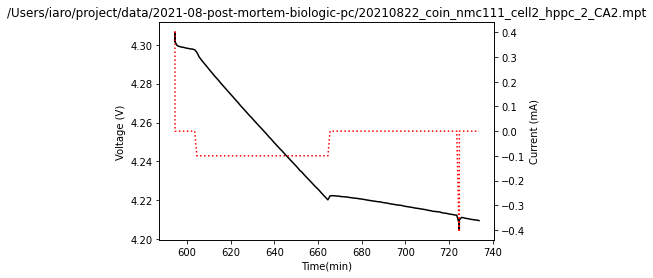

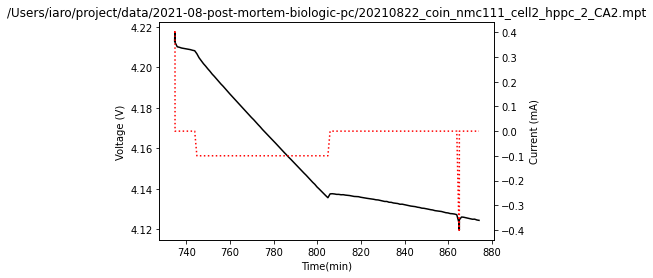

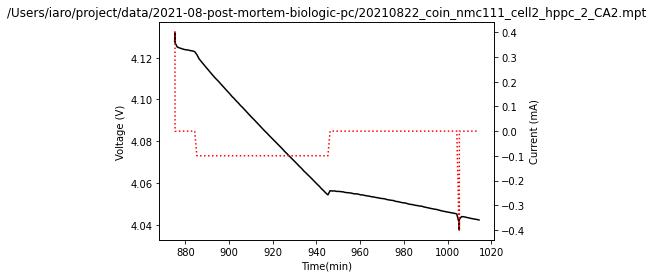

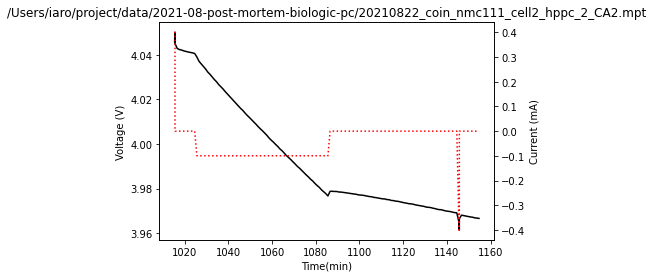

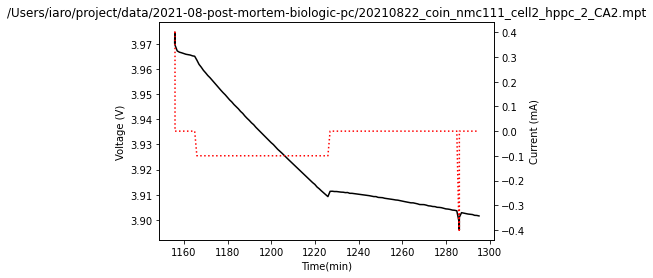

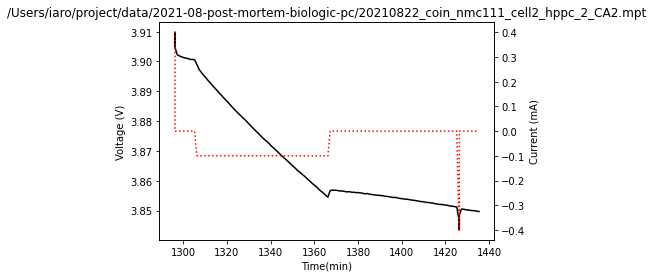

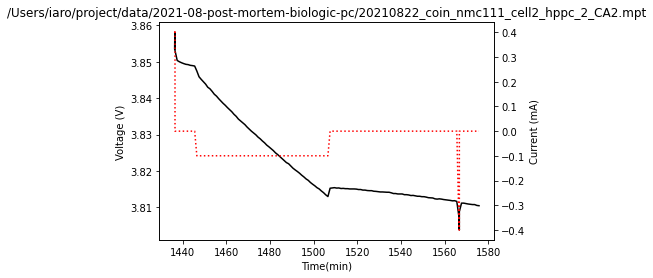

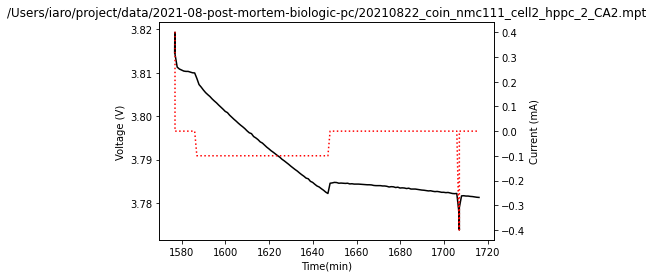

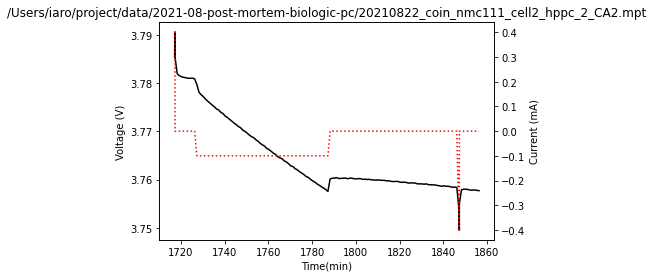

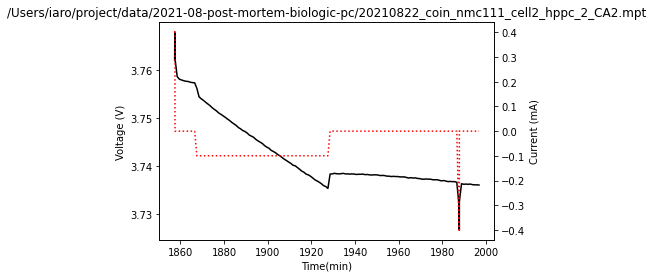

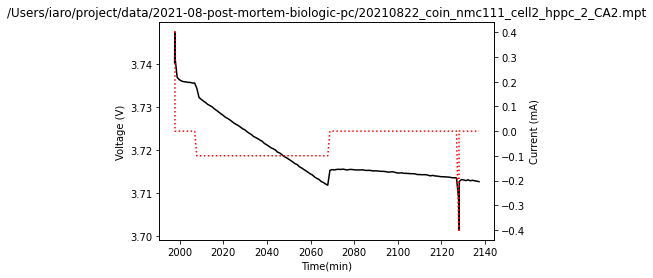

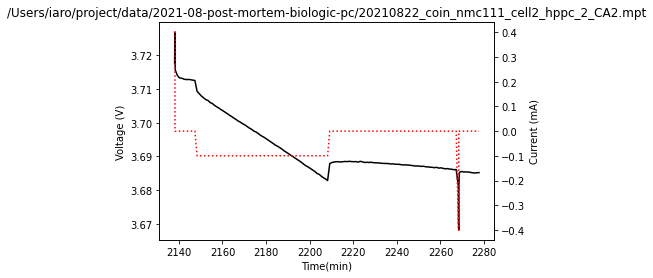

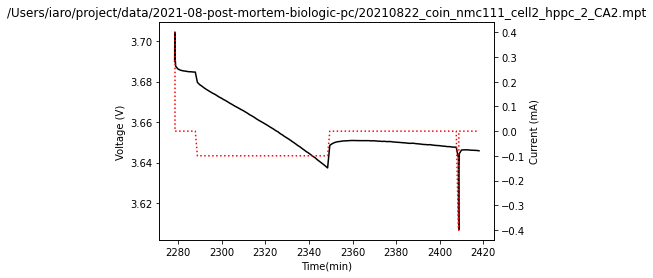

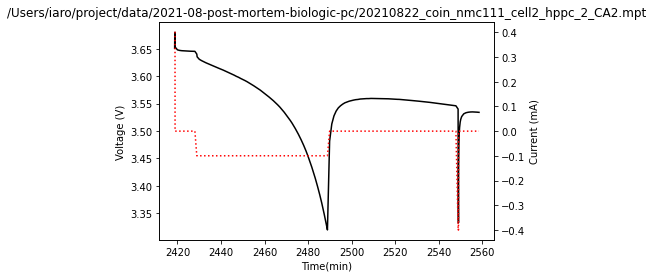

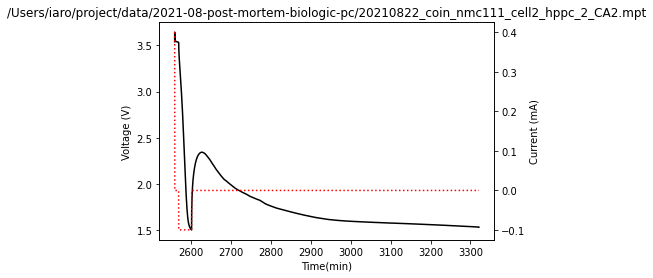

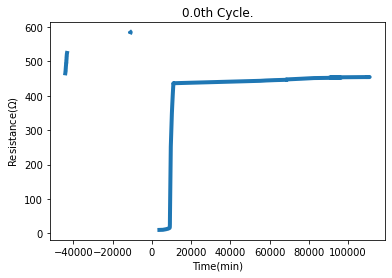

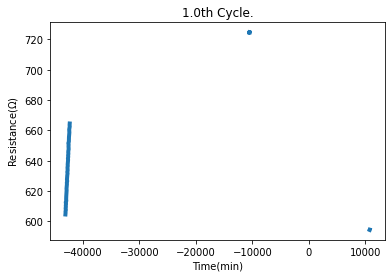

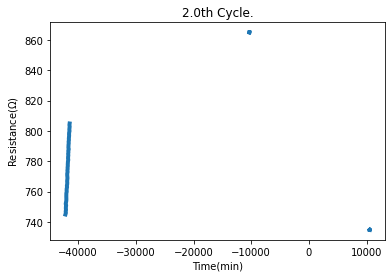

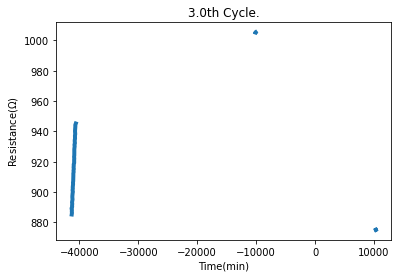

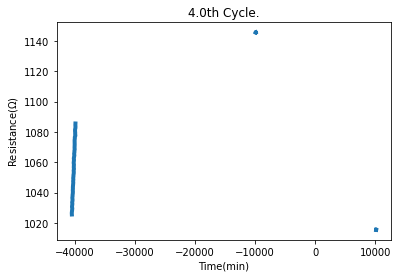

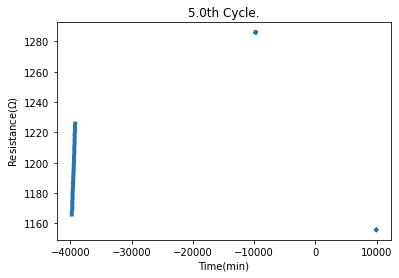

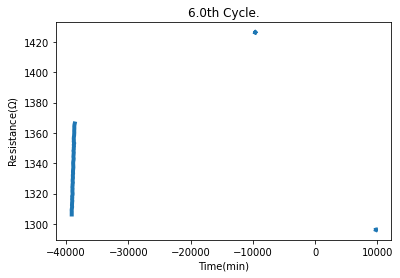

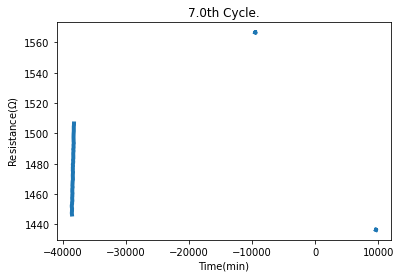

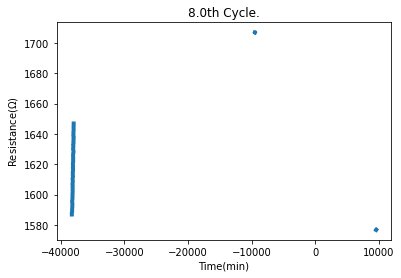

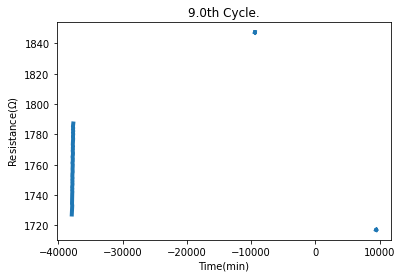

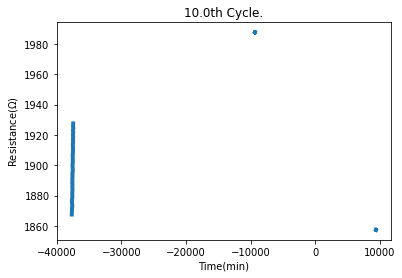

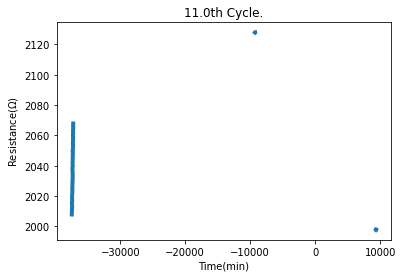

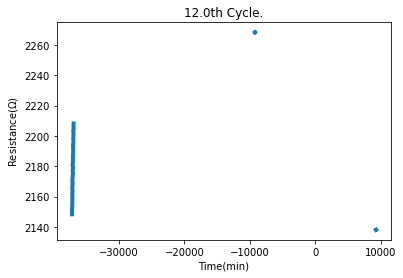

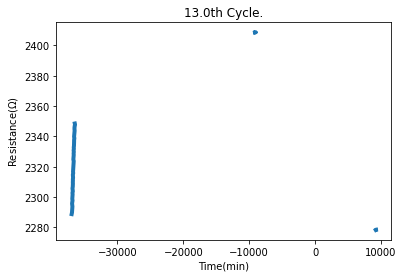

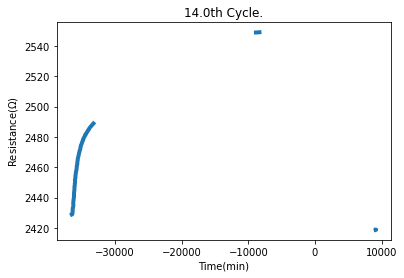

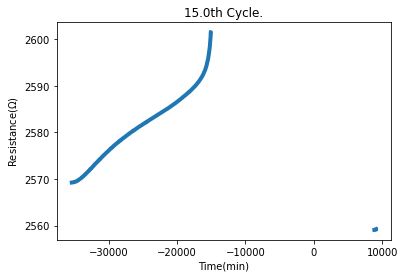

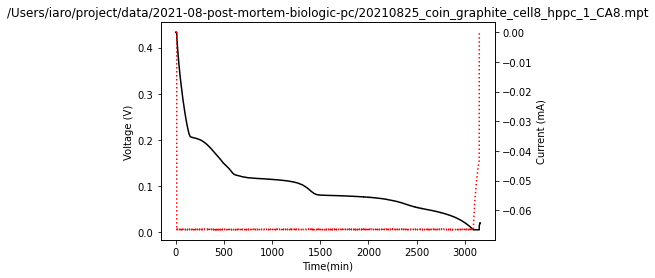

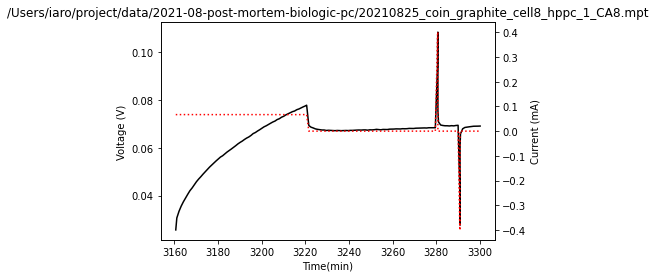

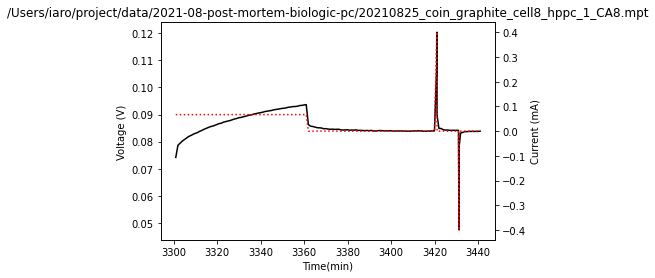

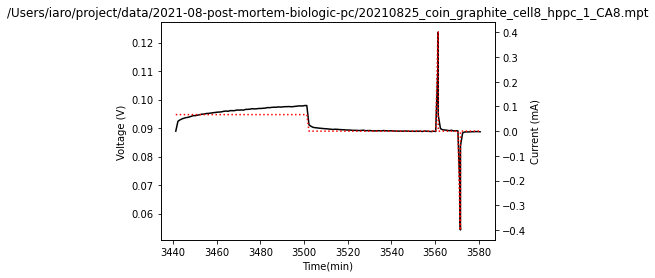

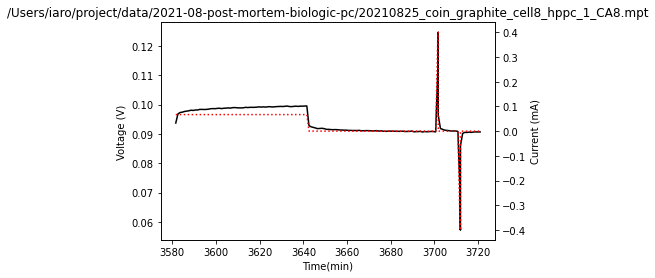

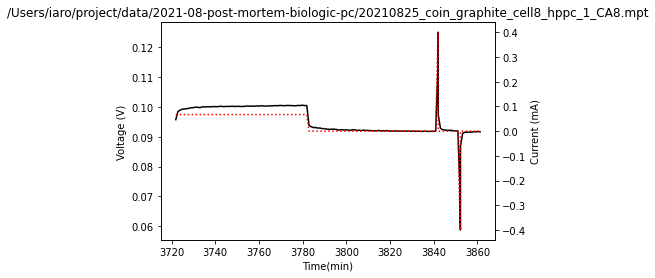

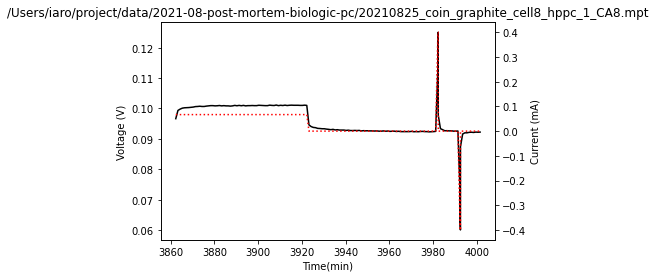

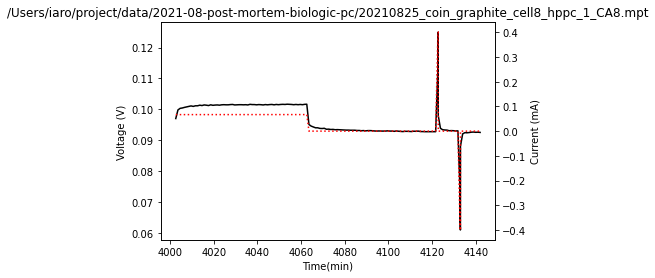

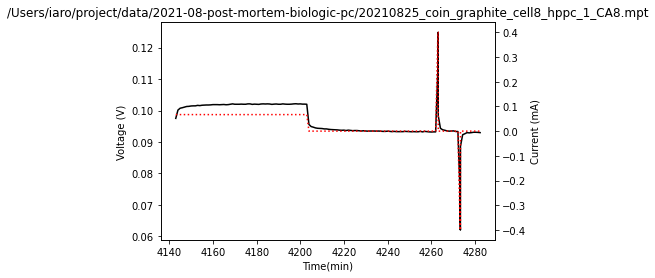

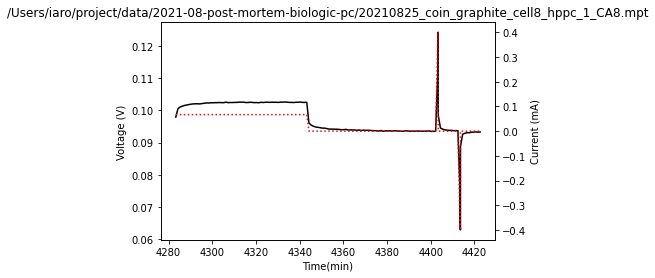

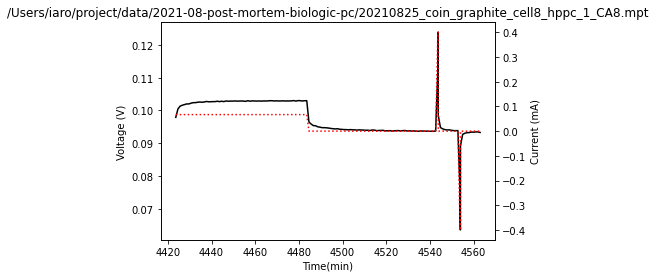

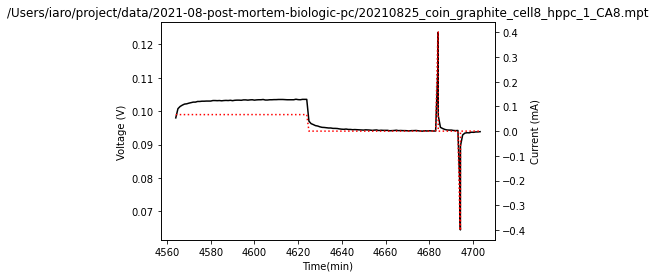

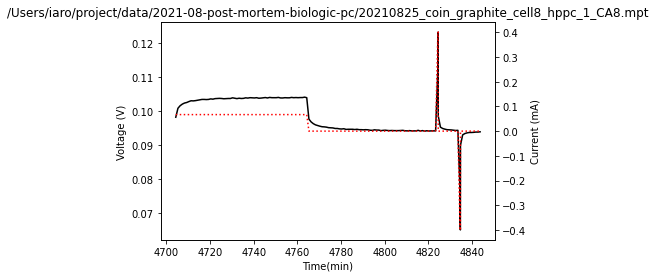

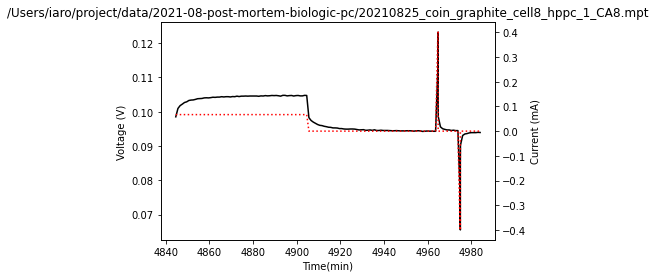

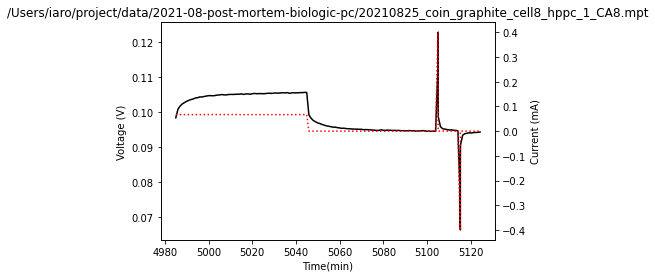

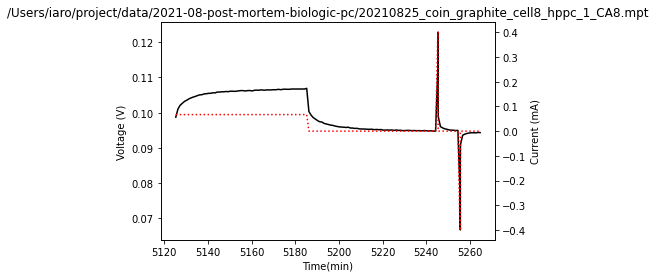

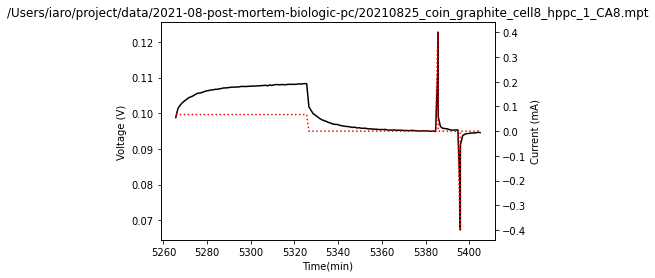

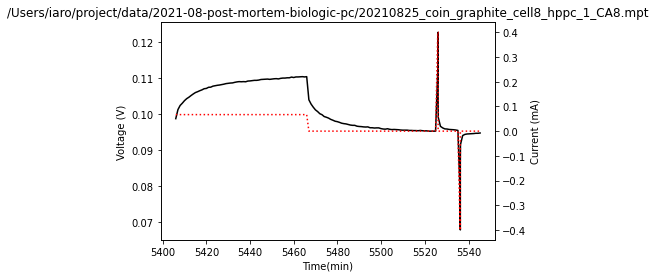

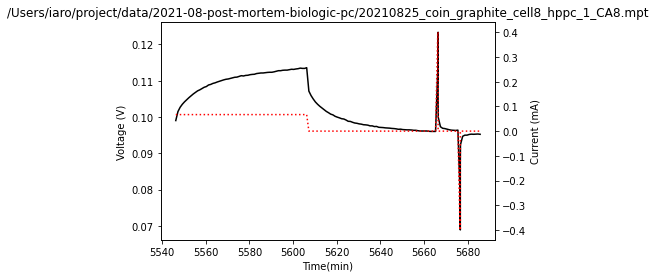

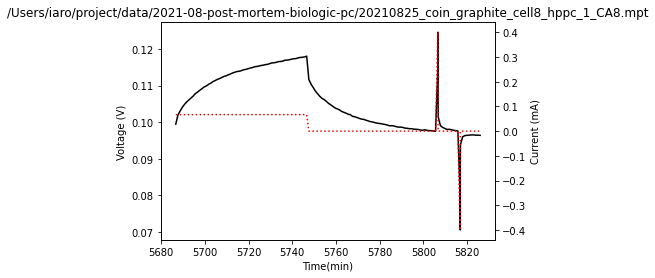

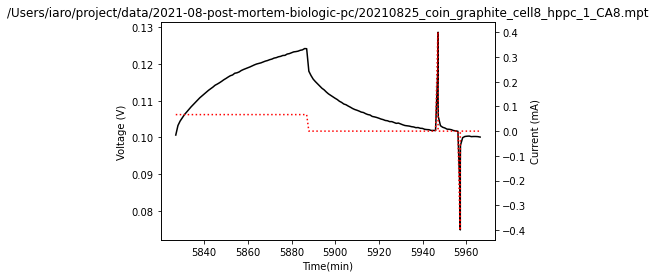

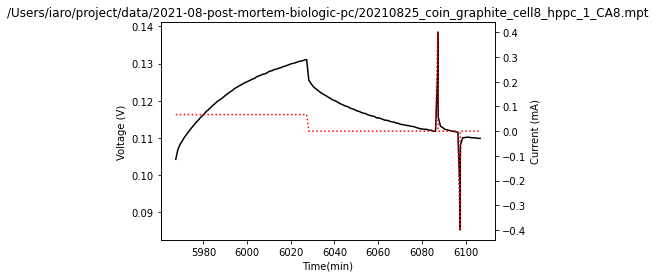

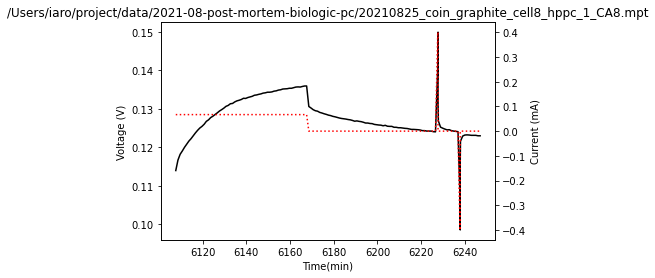

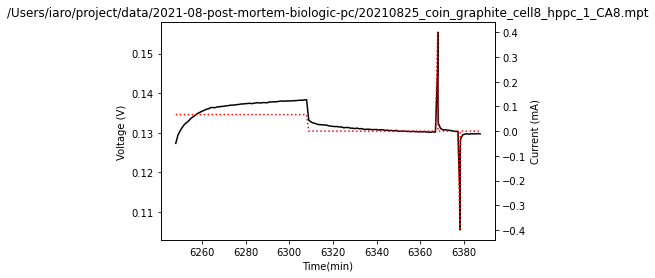

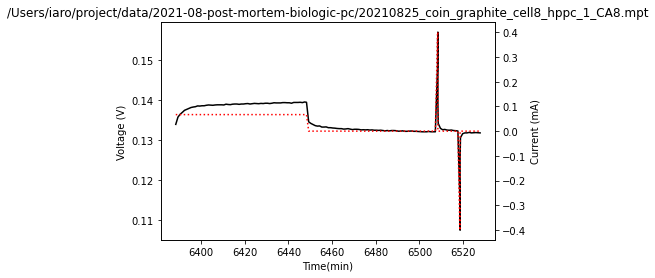

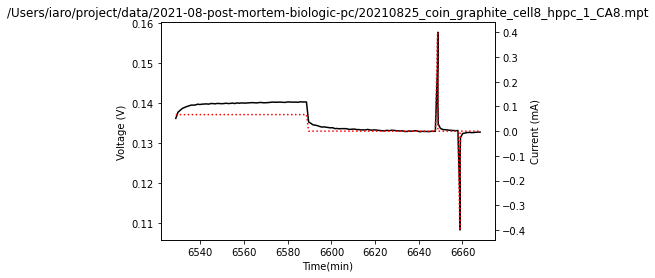

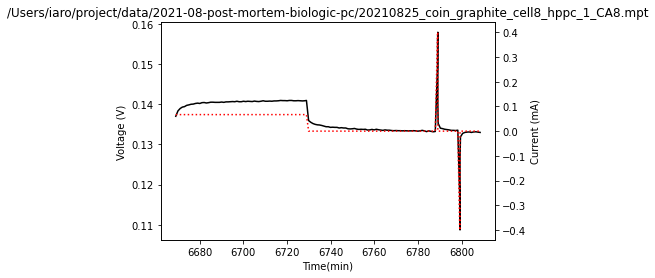

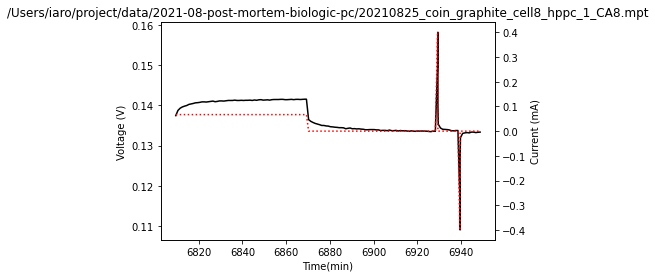

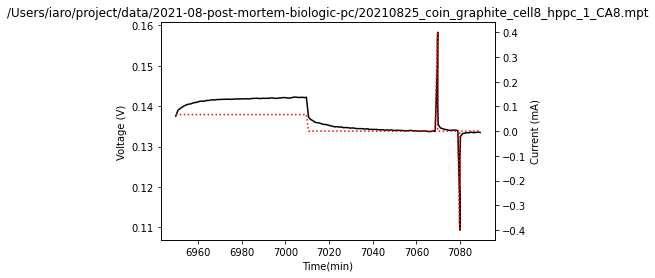

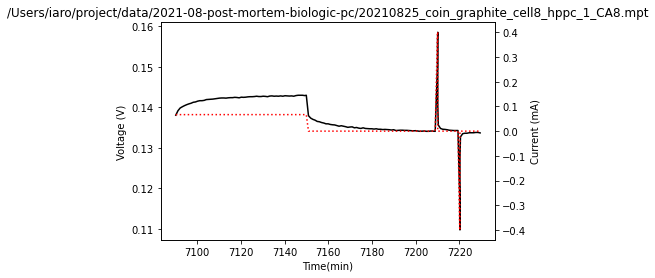

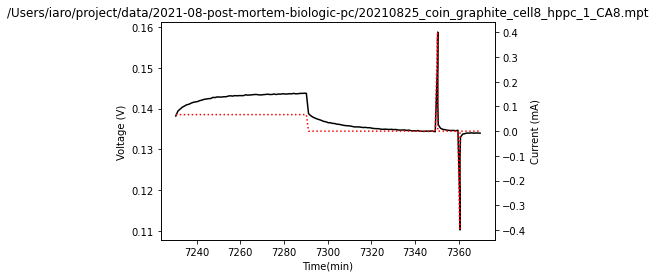

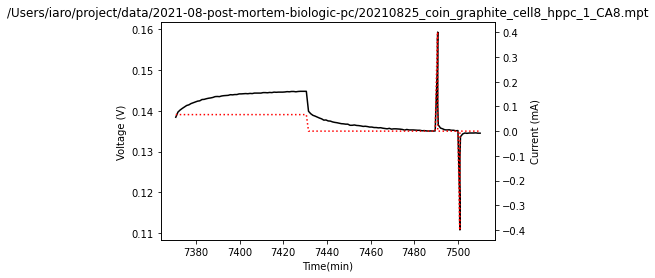

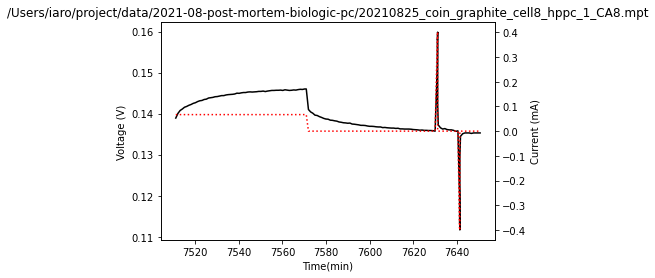

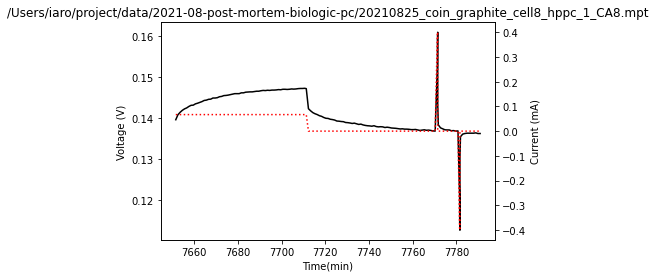

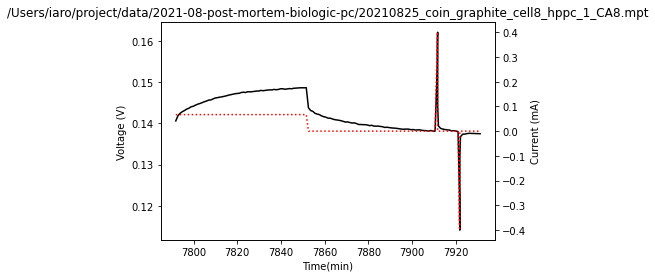

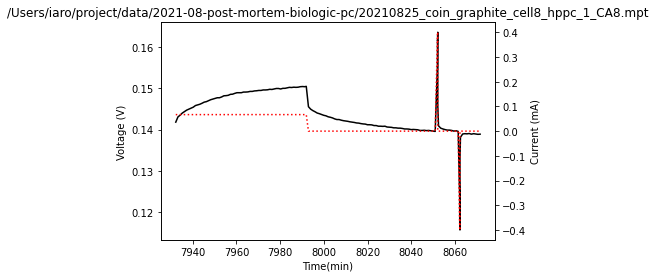

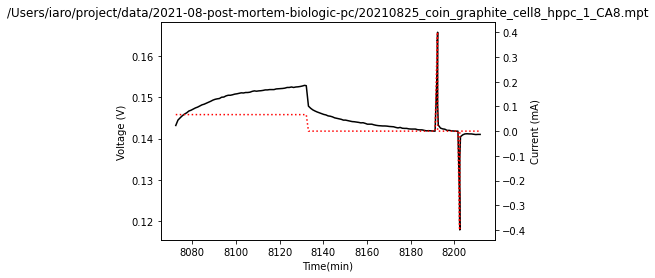

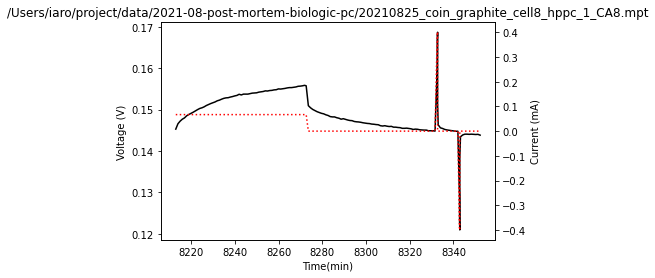

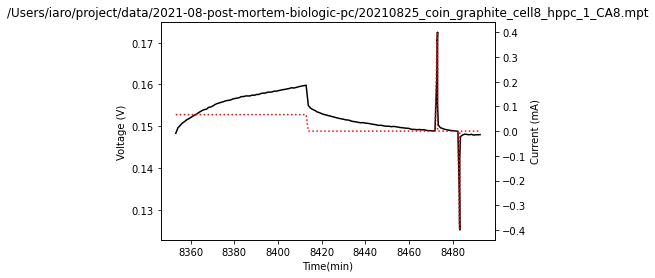

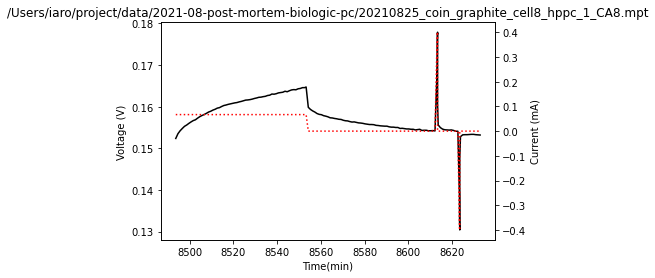

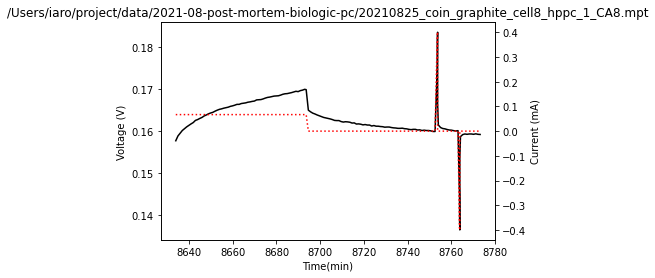

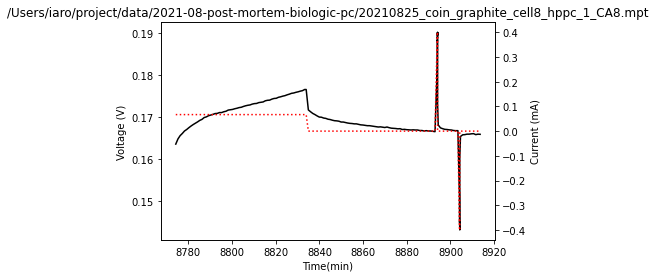

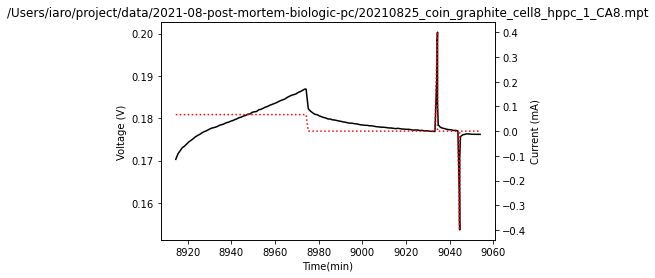

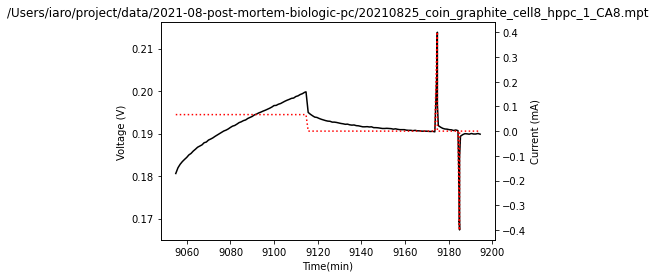

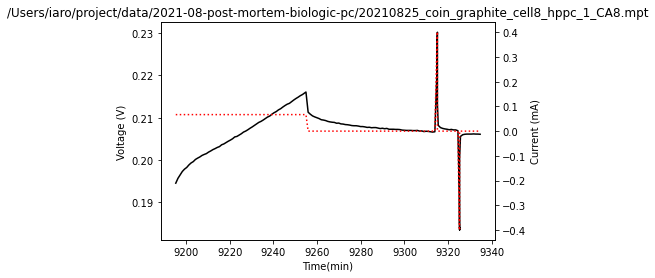

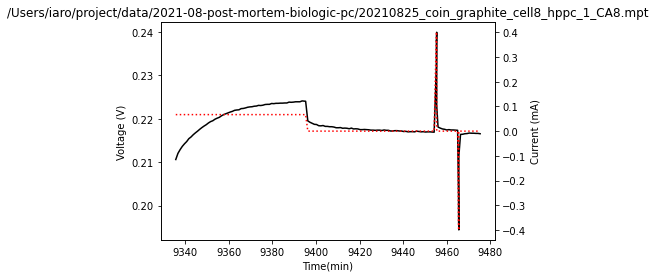

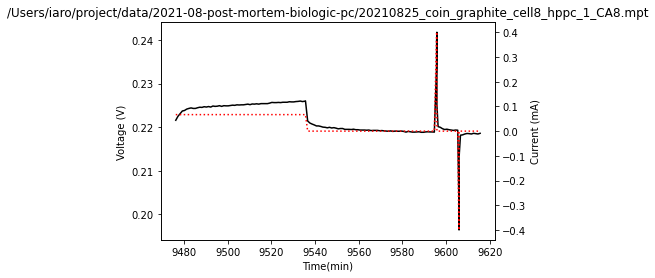

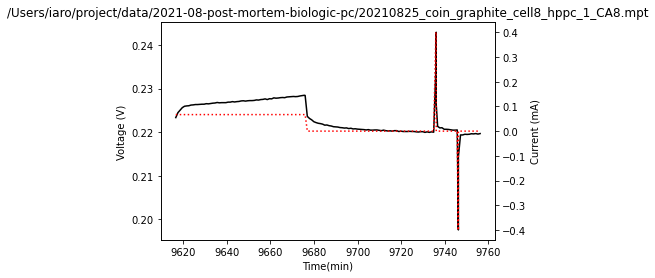

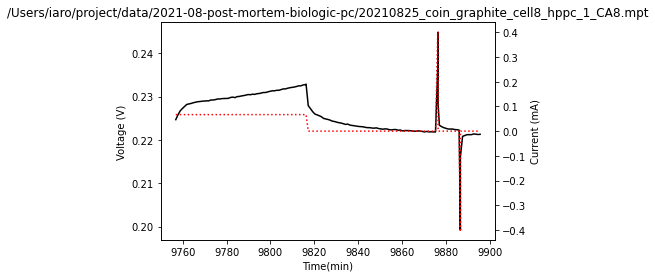

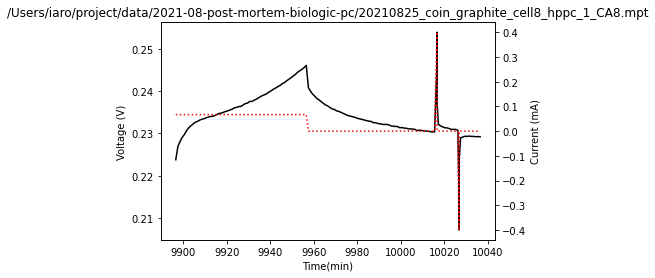

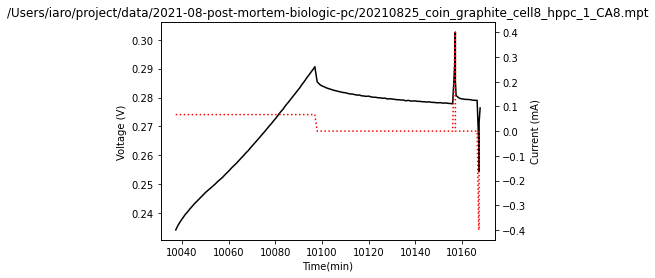

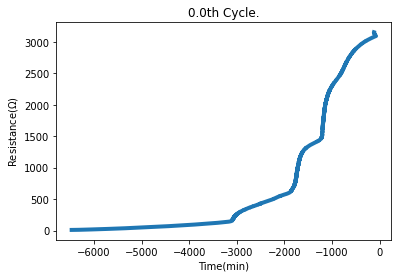

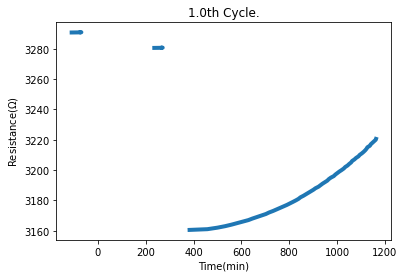

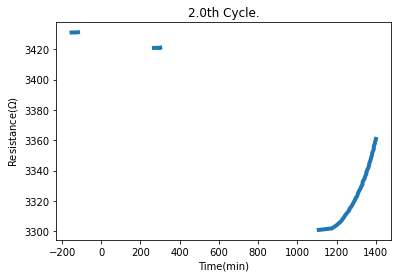

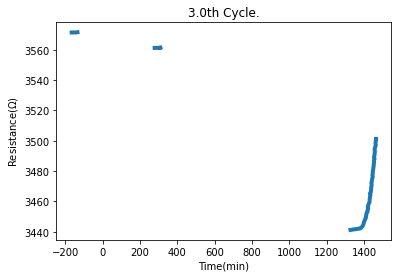

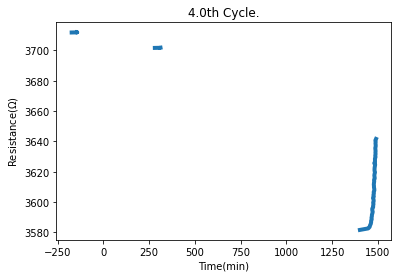

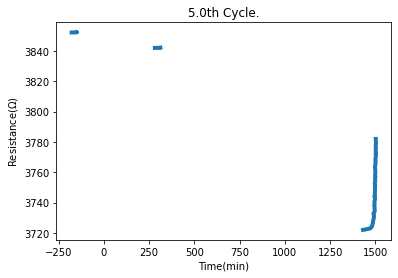

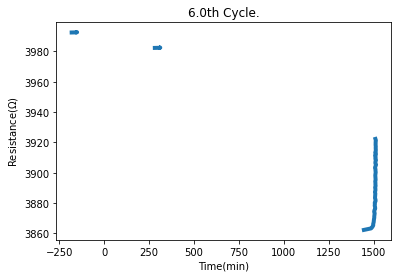

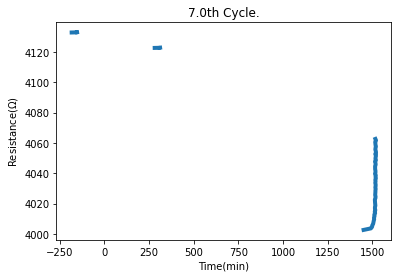

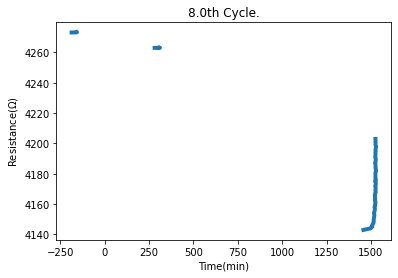

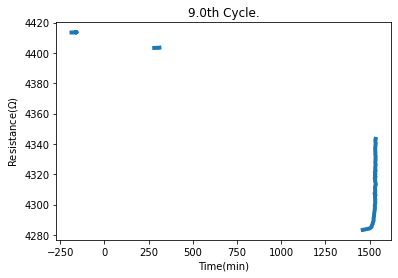

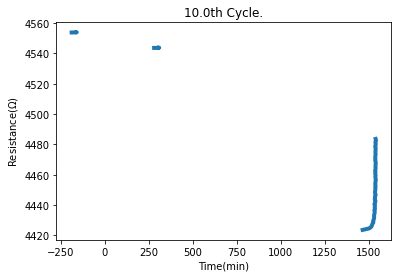

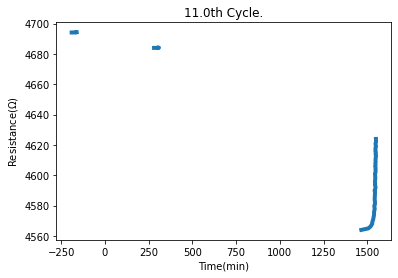

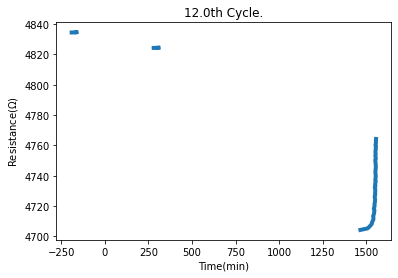

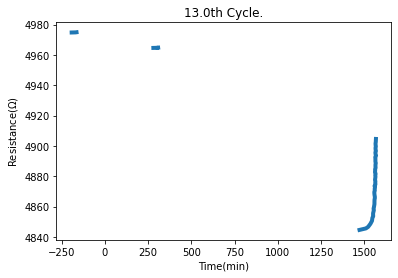

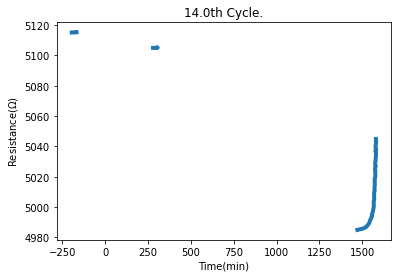

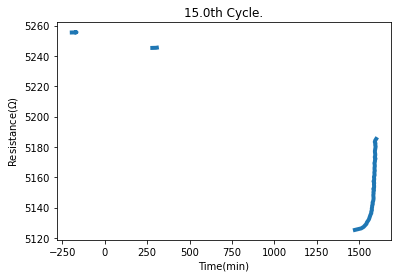

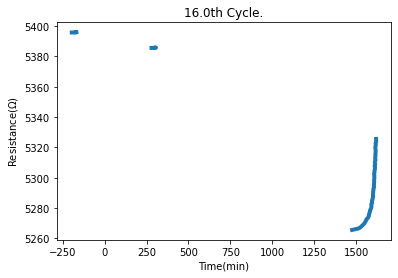

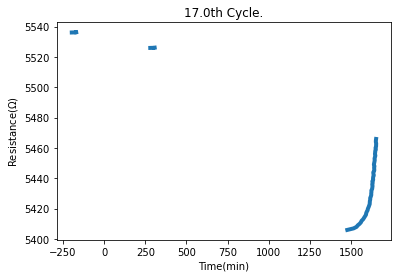

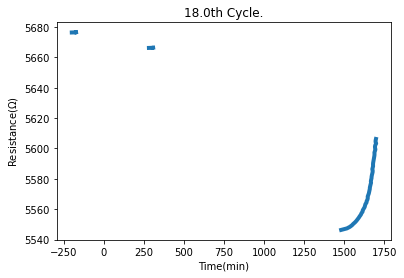

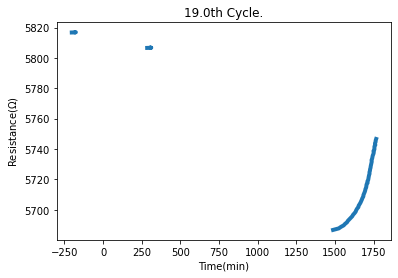

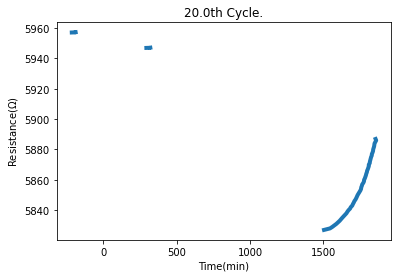

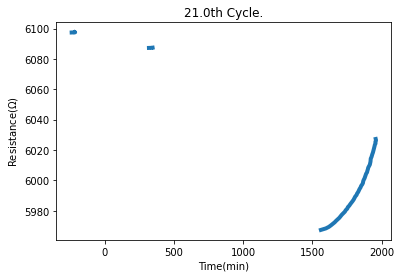

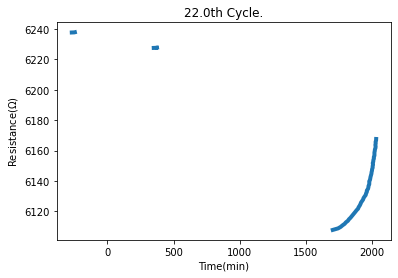

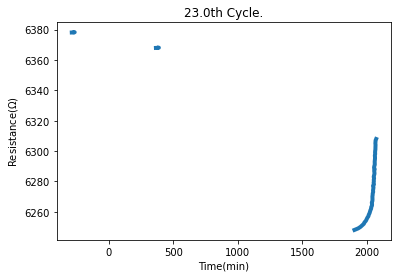

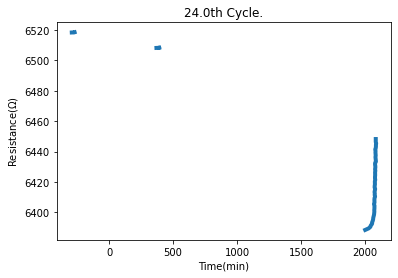

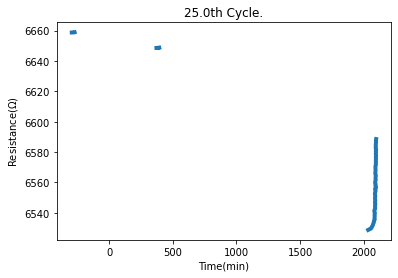

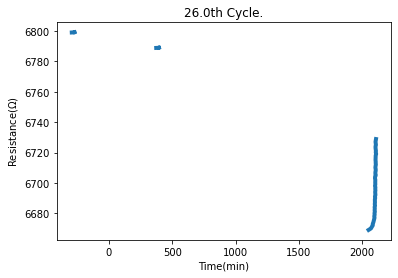

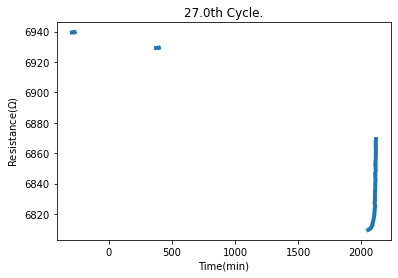

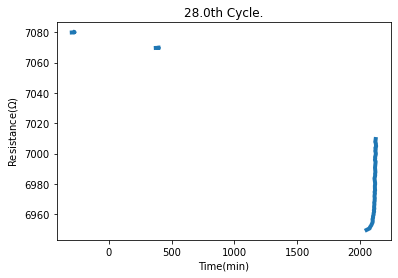

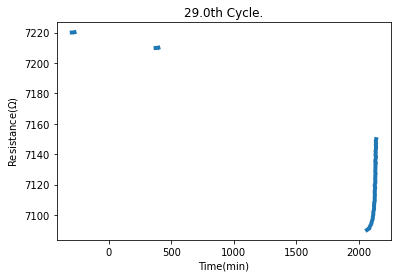

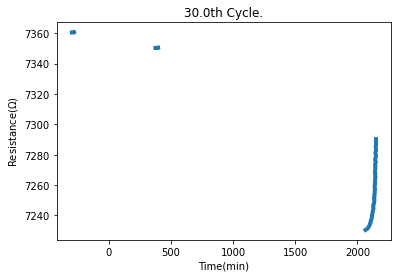

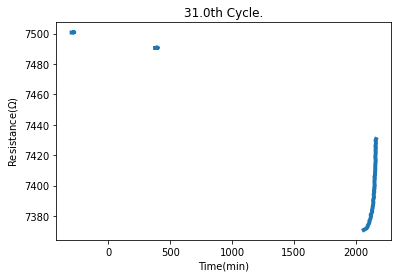

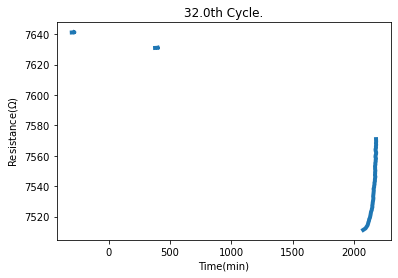

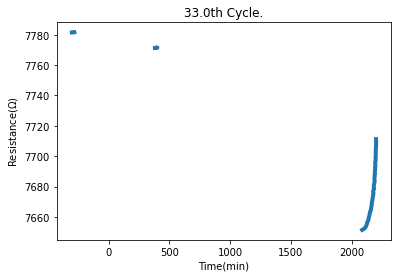

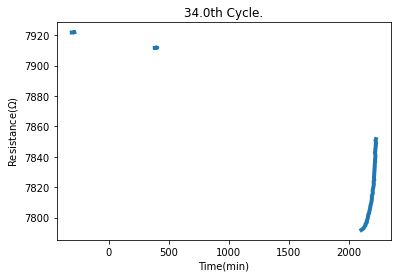

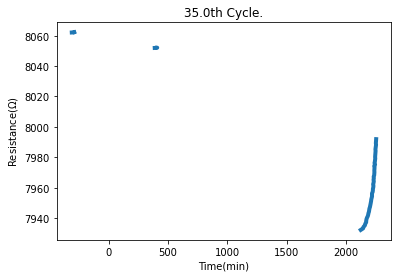

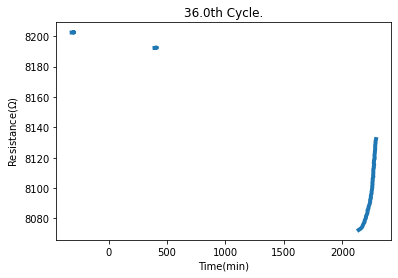

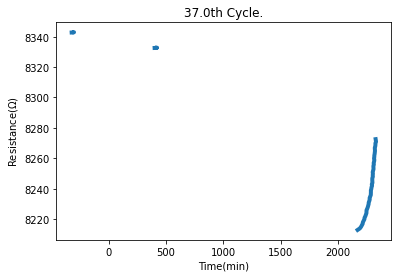

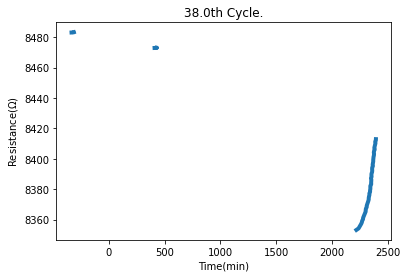

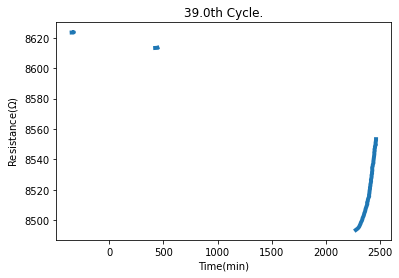

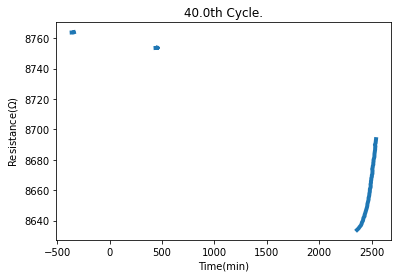

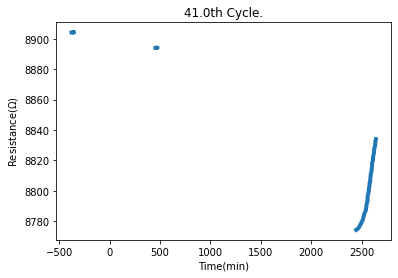

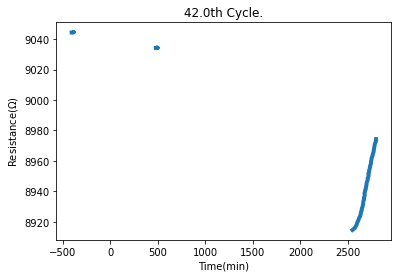

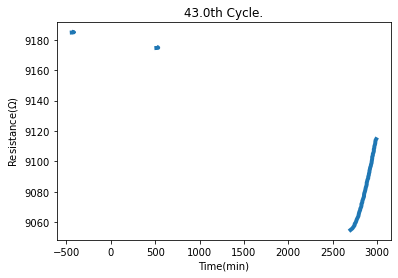

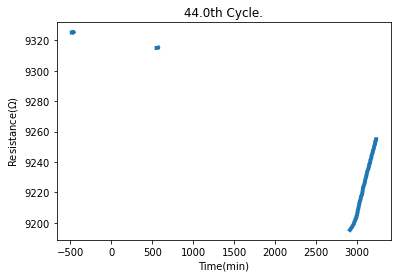

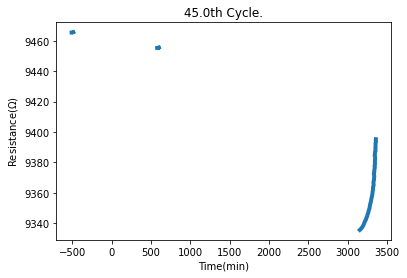

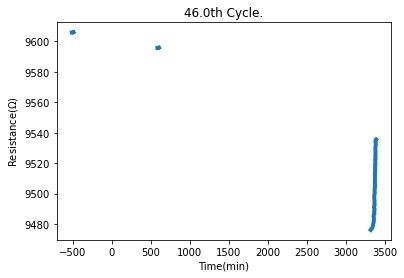

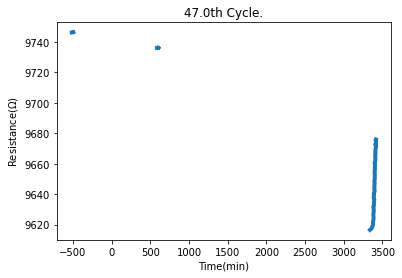

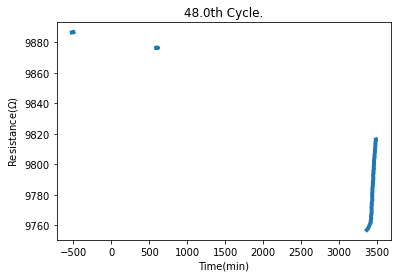

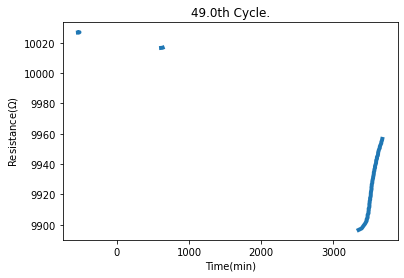

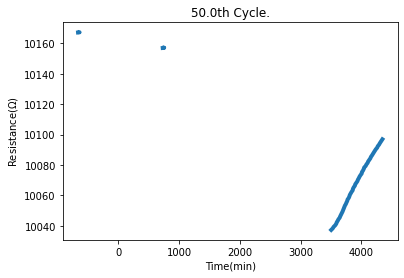

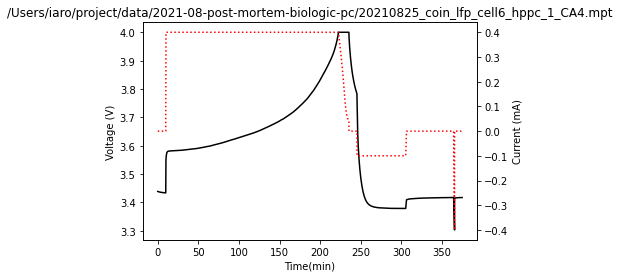

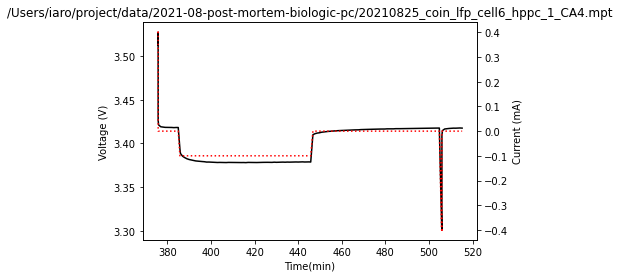

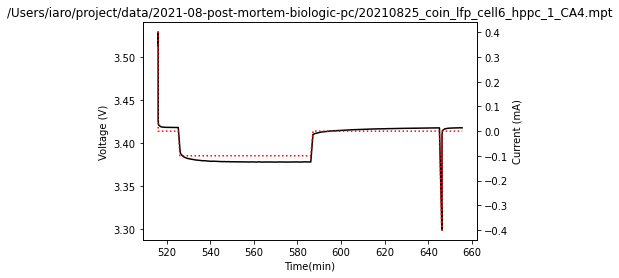

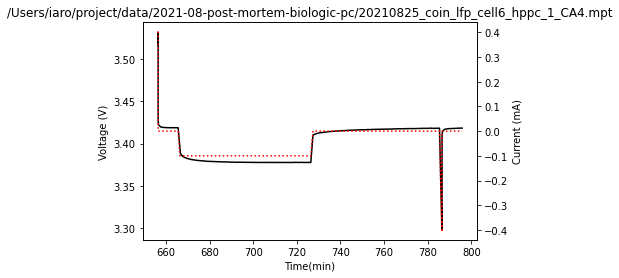

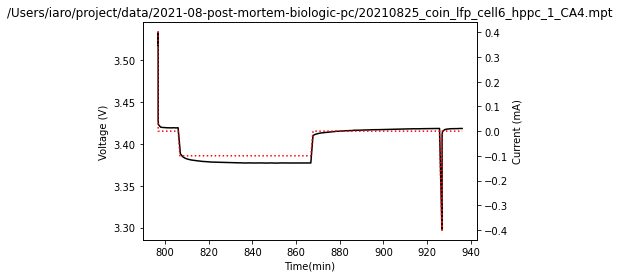

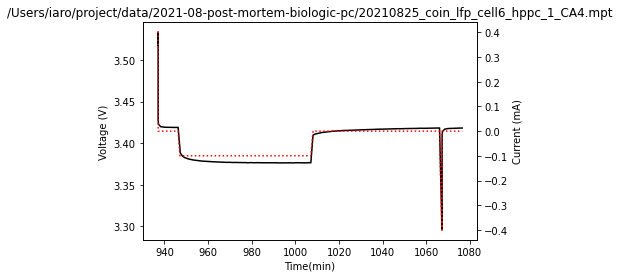

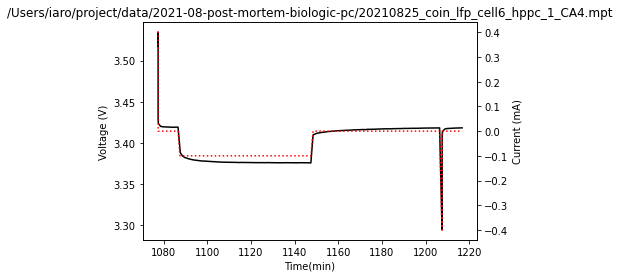

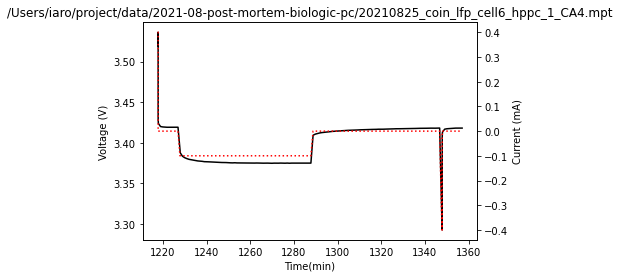

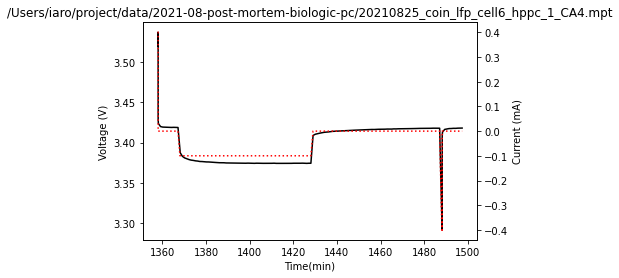

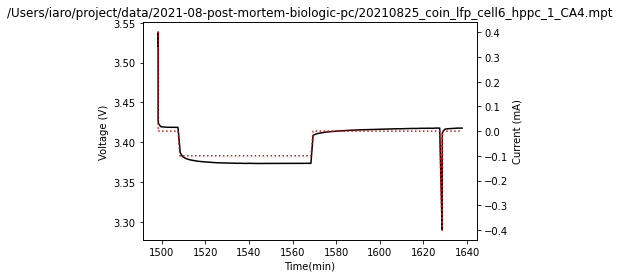

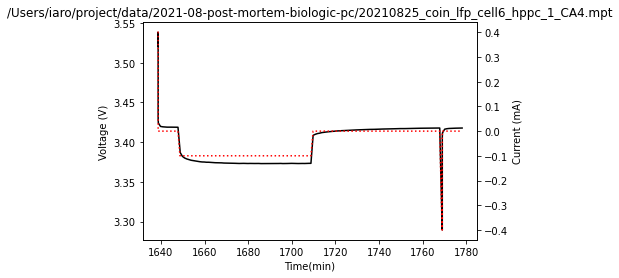

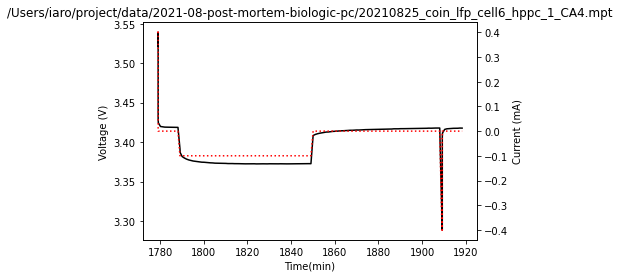

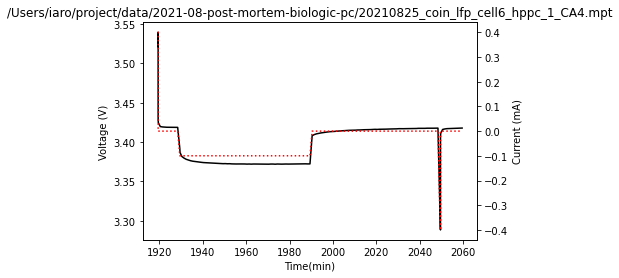

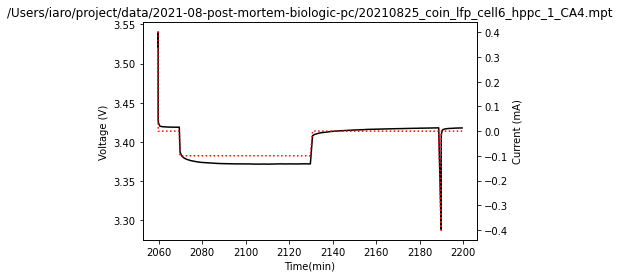

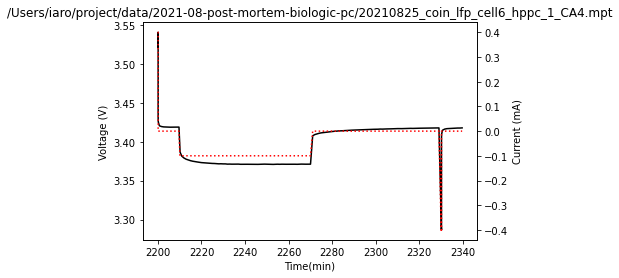

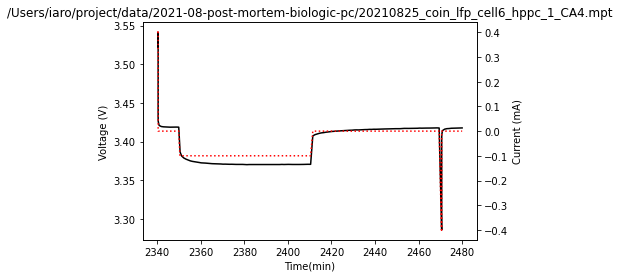

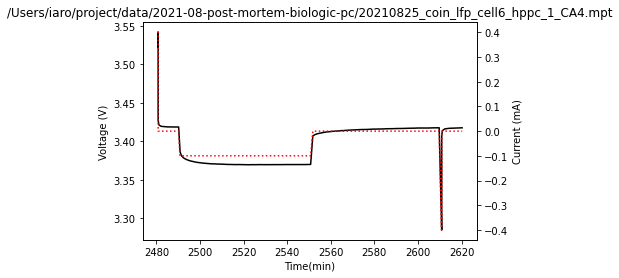

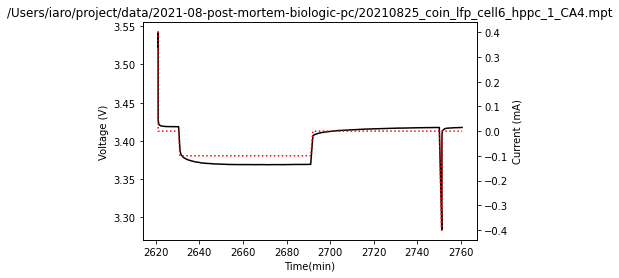

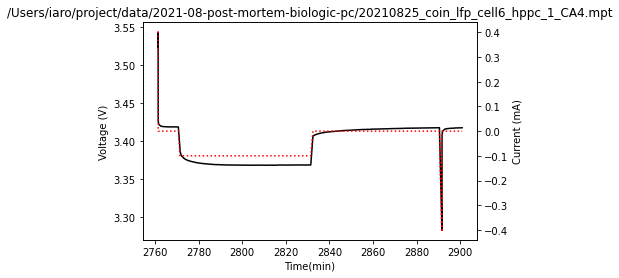

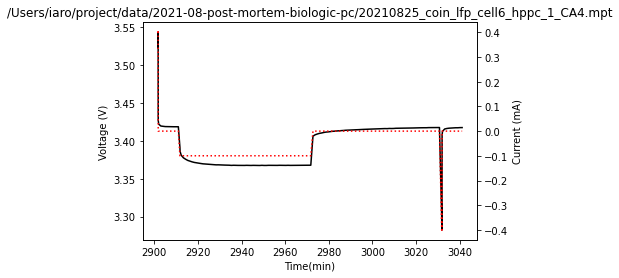

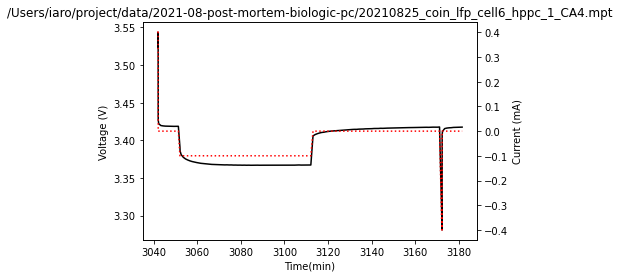

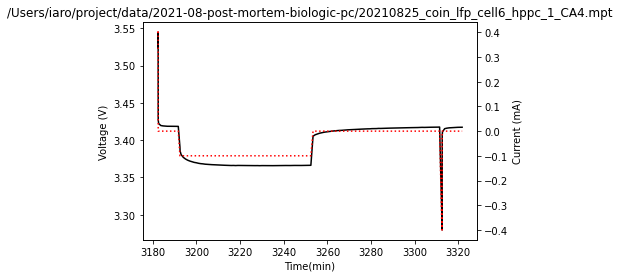

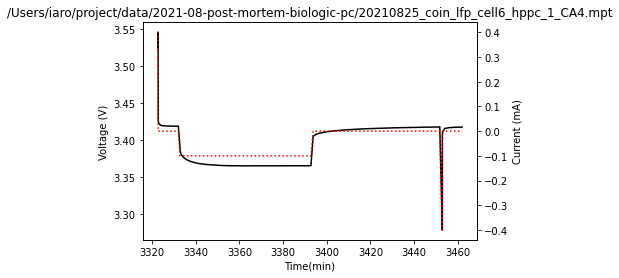

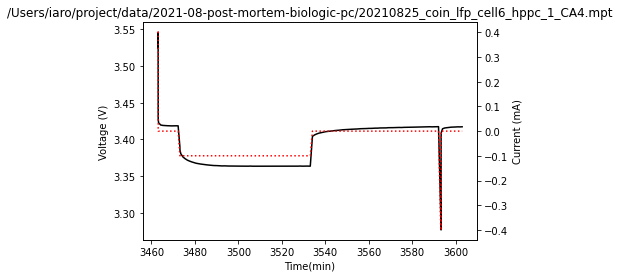

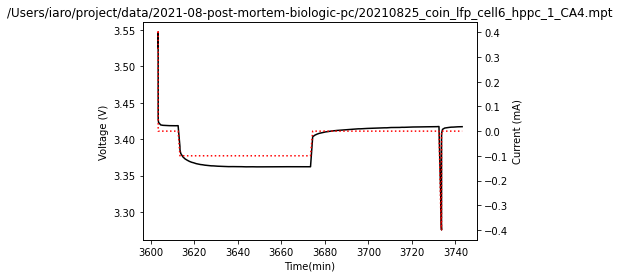

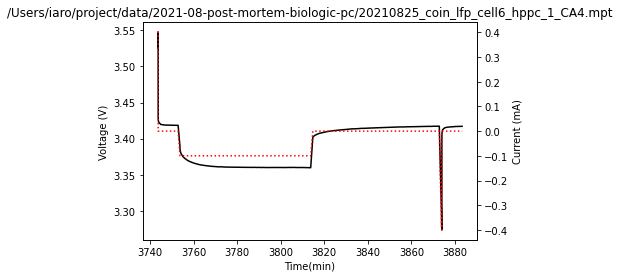

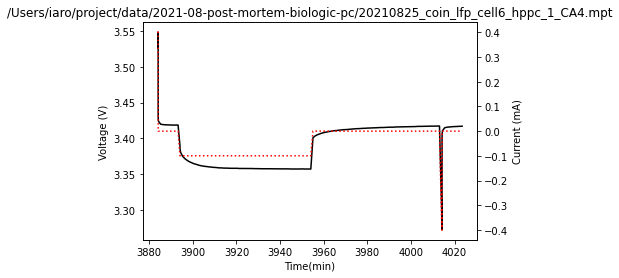

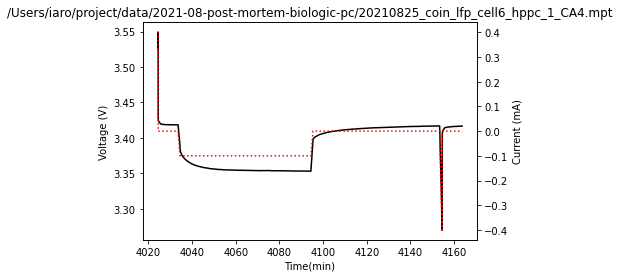

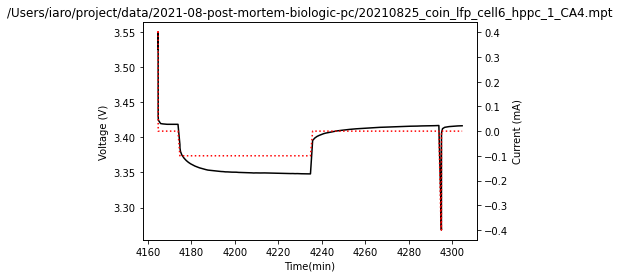

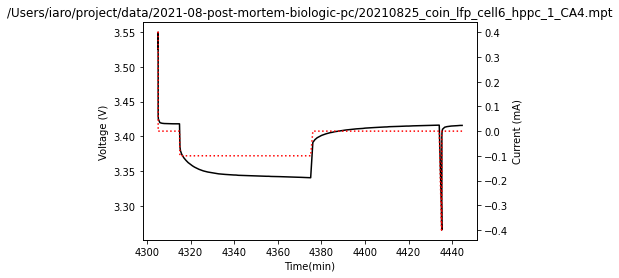

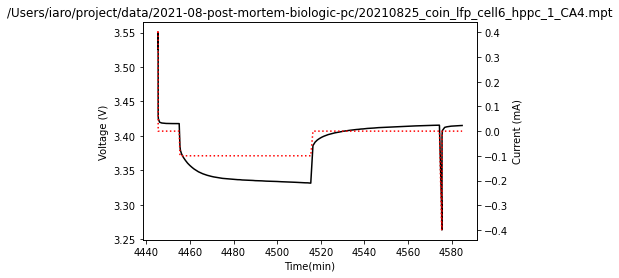

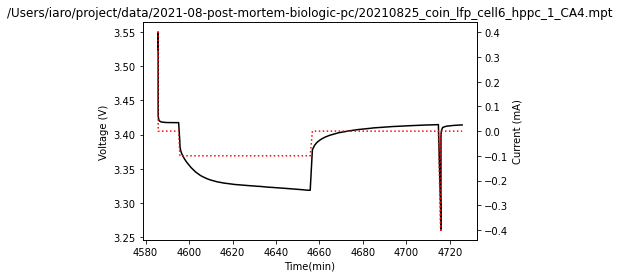

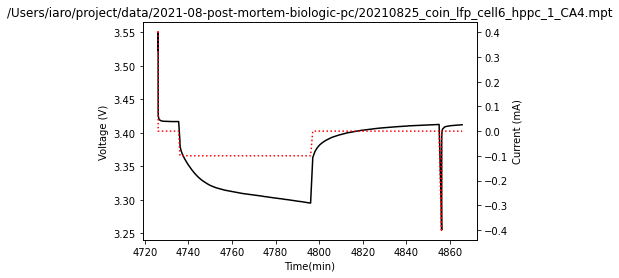

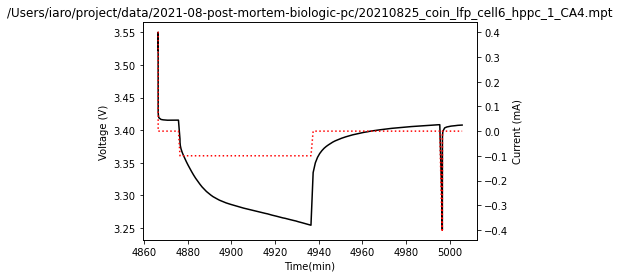

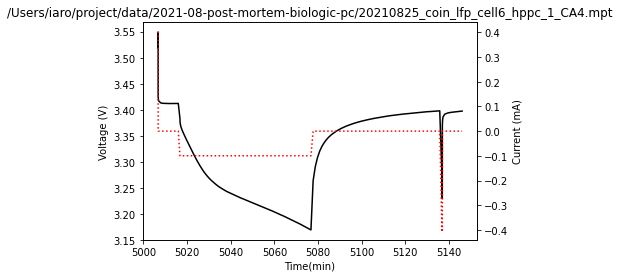

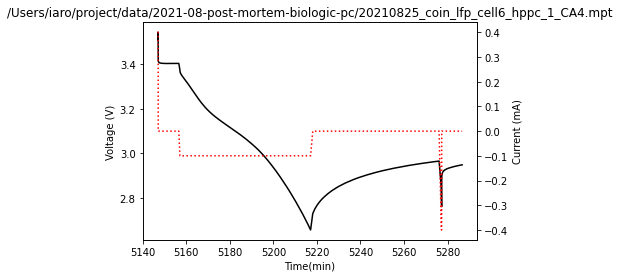

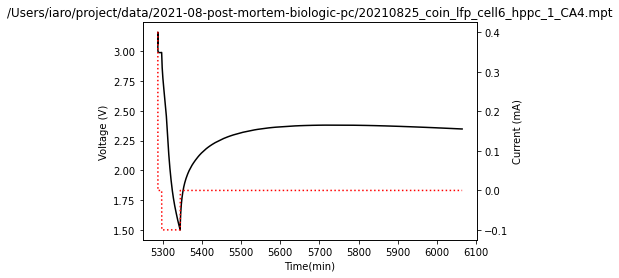

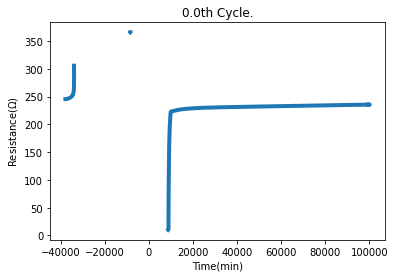

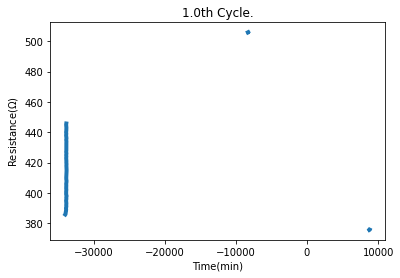

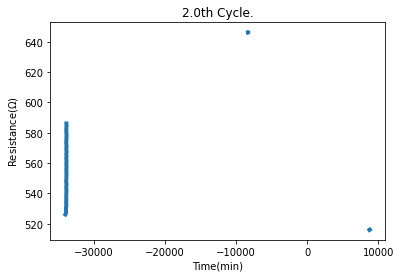

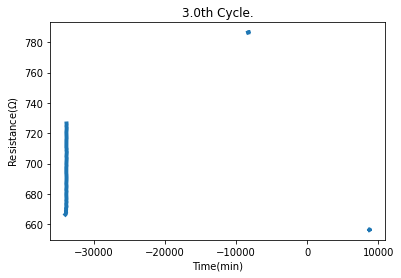

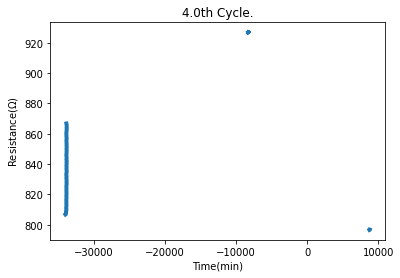

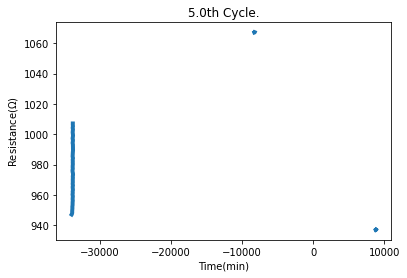

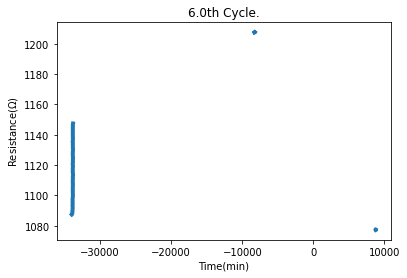

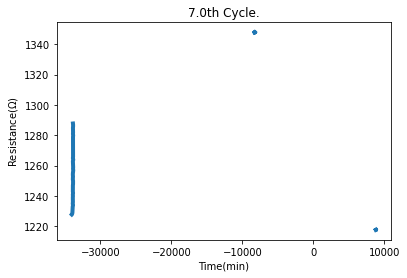

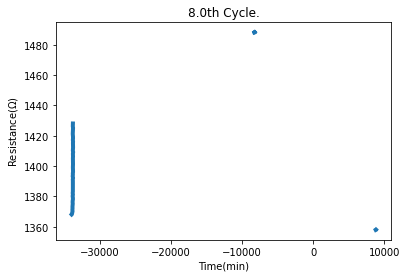

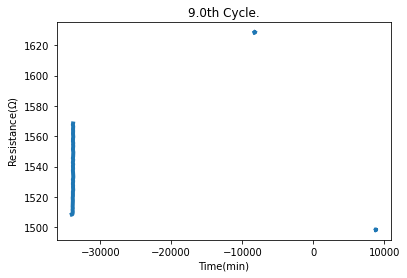

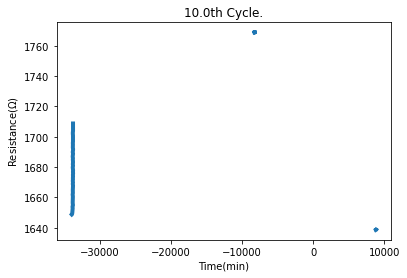

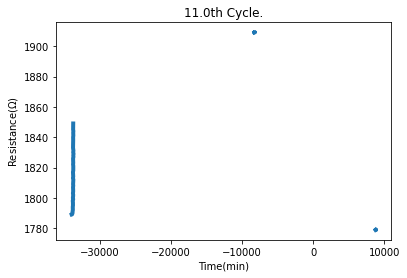

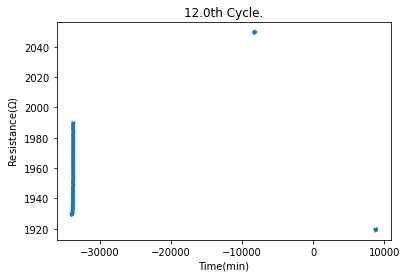

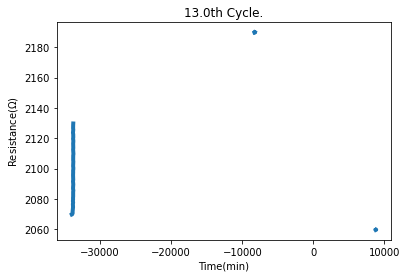

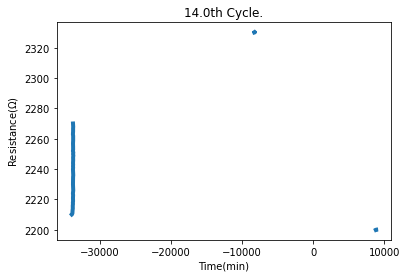

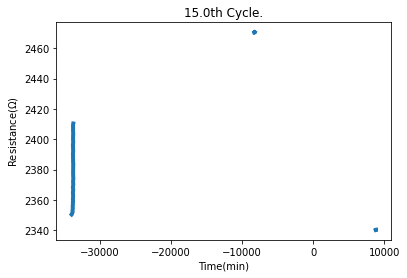

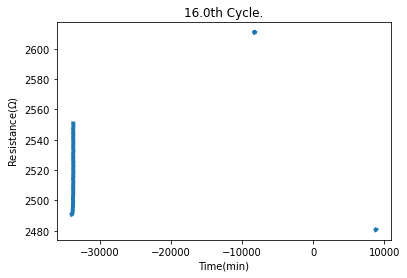

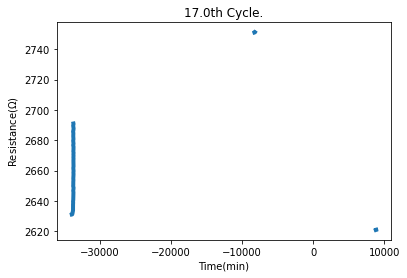

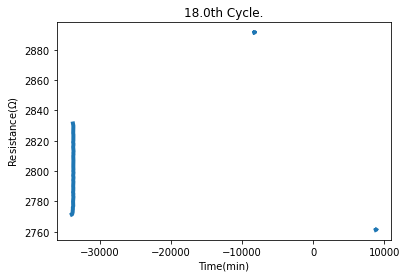

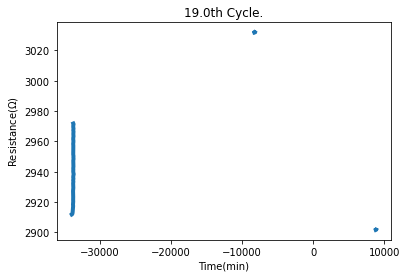

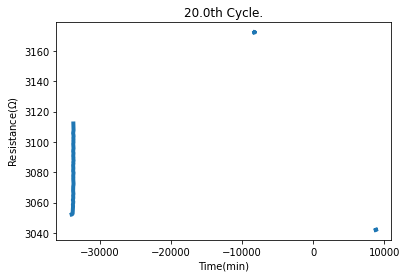

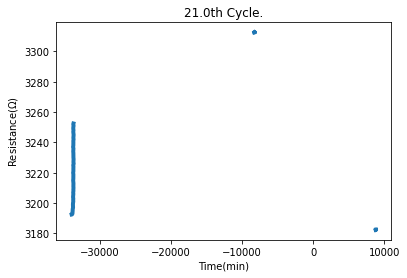

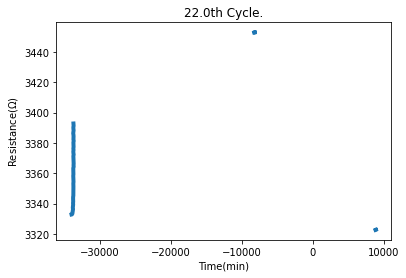

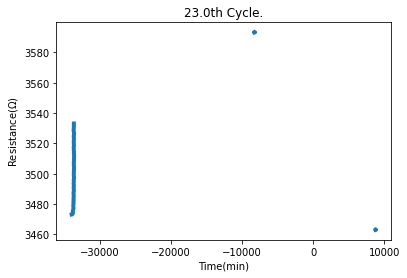

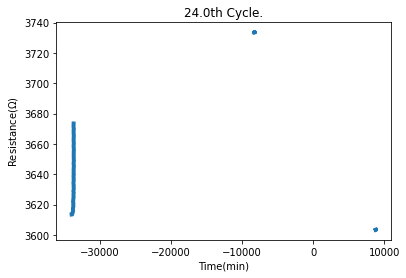

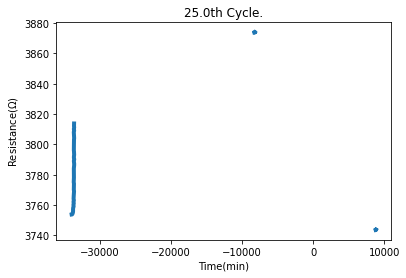

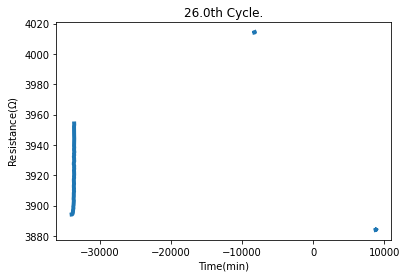

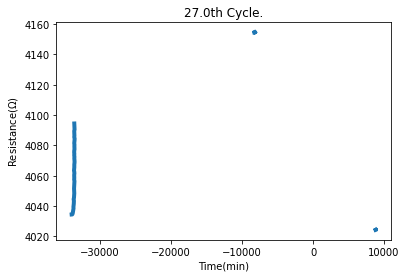

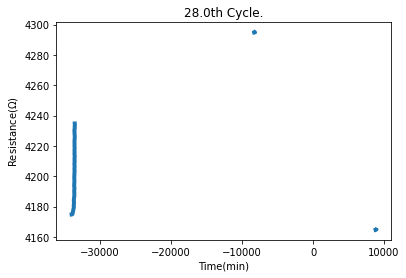

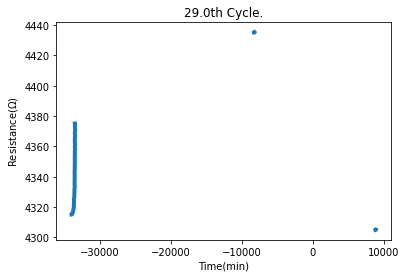

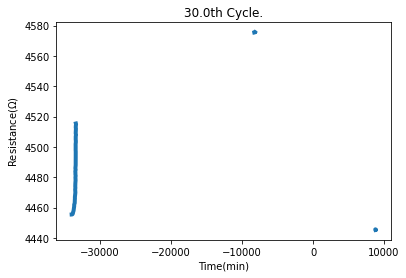

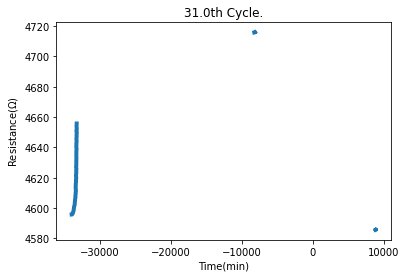

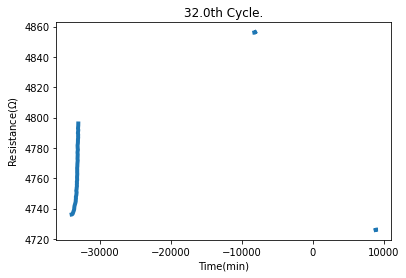

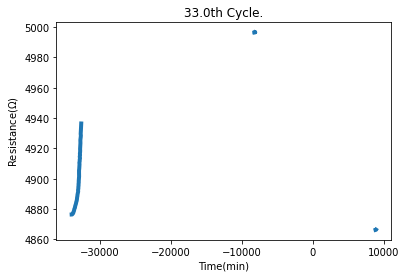

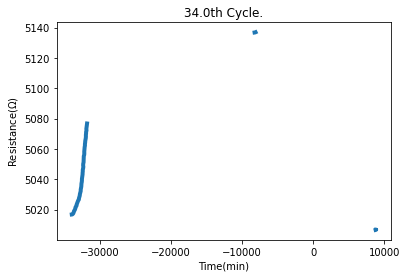

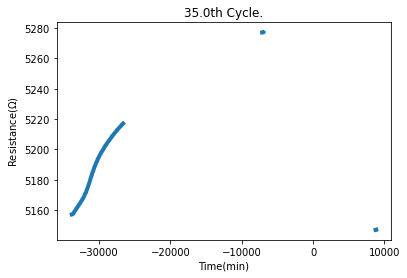

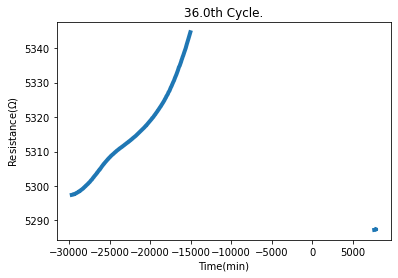

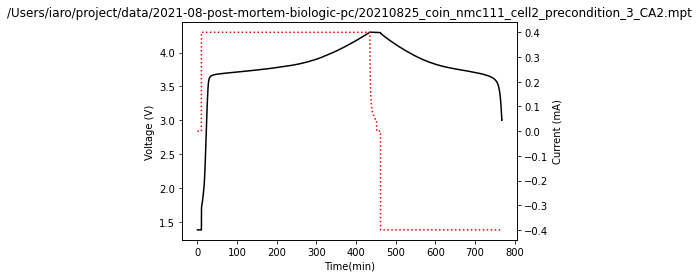

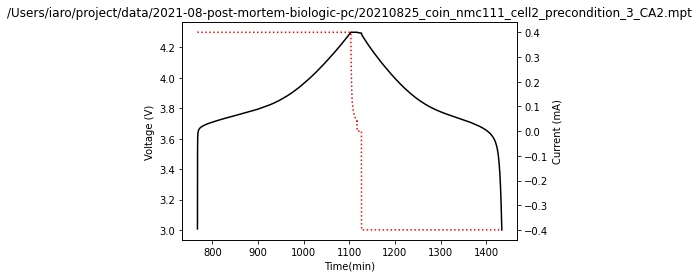

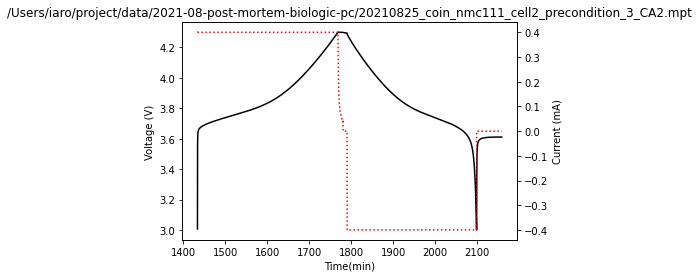

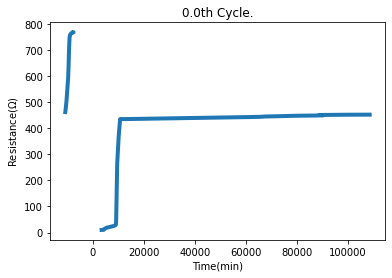

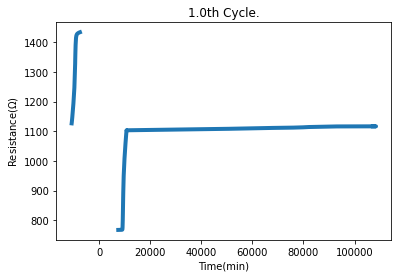

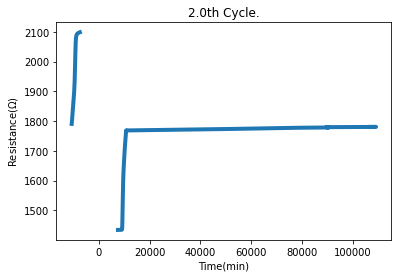

In [37]:
for file1 in file_paths[0]:
    num_header_lines = 106
    applied_current = applied_current_ma_vec[0]
    is_cathode = is_cathode_vec[0]
    name = name_vec[0]
    df = pd.read_csv(file1, header=num_header_lines, sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
    VoltageCurrent(df, file1)
    Resistance(df)